# Credit Card Fraud Detection Case Study

### Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help 
of machine learning models.

In this project, you will analyse customer-level data that has been collected and analysed during a research collaboration 
of Worldline and the Machine Learning Group.

### Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, 
poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, 
this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. 
With the rise in digital payment channels, the number of fraudulent transactions is also increasing 
in new and different ways.
 
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them
to put proactive monitoring and fraud prevention mechanisms in place. 
Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees 
as well as denials of legitimate transactions.

### Understanding and defining fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder
for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating
information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

* Manipulation/alteration of genuine cards

* Creation of counterfeit cards

* Stealing/loss of credit cards

* Fraudulent telemarketing

In [1]:
### About the dataset

* The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. 
Out of a total of 2,84,807 transactions, 492 were fraudulent. 
* This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. 
* The data set has also been modified with principal component analysis (PCA) to maintain confidentiality.
* Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. 
* The feature 'time' contains the seconds elapsed between the first 
transaction in the data set and the subsequent transactions. 
* The feature 'amount' is the transaction amount. 
* The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
import zipfile
zf = zipfile.ZipFile("C:\\Users\\501200I403\Downloads\\creditcard.csv.zip")
df = pd.read_csv(zf.open('creditcard.csv'))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [4]:
column_list = (list(df.columns))
print(column_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Handling Missing Values

In [7]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


Observation:
We can see that there is no missing value present in the dataframe.

# Exploratory Data Analysis

In [8]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


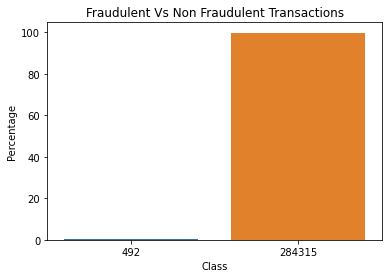

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.title("Fraudulent Vs Non Fraudulent Transactions")
sns.barplot(classes, y = [normal_share,fraud_share])
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.show()

Observation: The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradulent transaction. 
The percentage of distribution for majority class is 99.83% and minority class is 0.17%

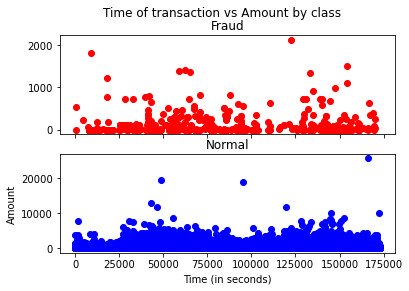

In [10]:
# Create a scatter plot to observe the distribution of classes with time and amount
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
# time vs Amount

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, color = 'red')
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount, color = 'blue')
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

# Outliers treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. 
Hence, we are not performing any outliers treatment on the dataframe, though we still see outliers available.

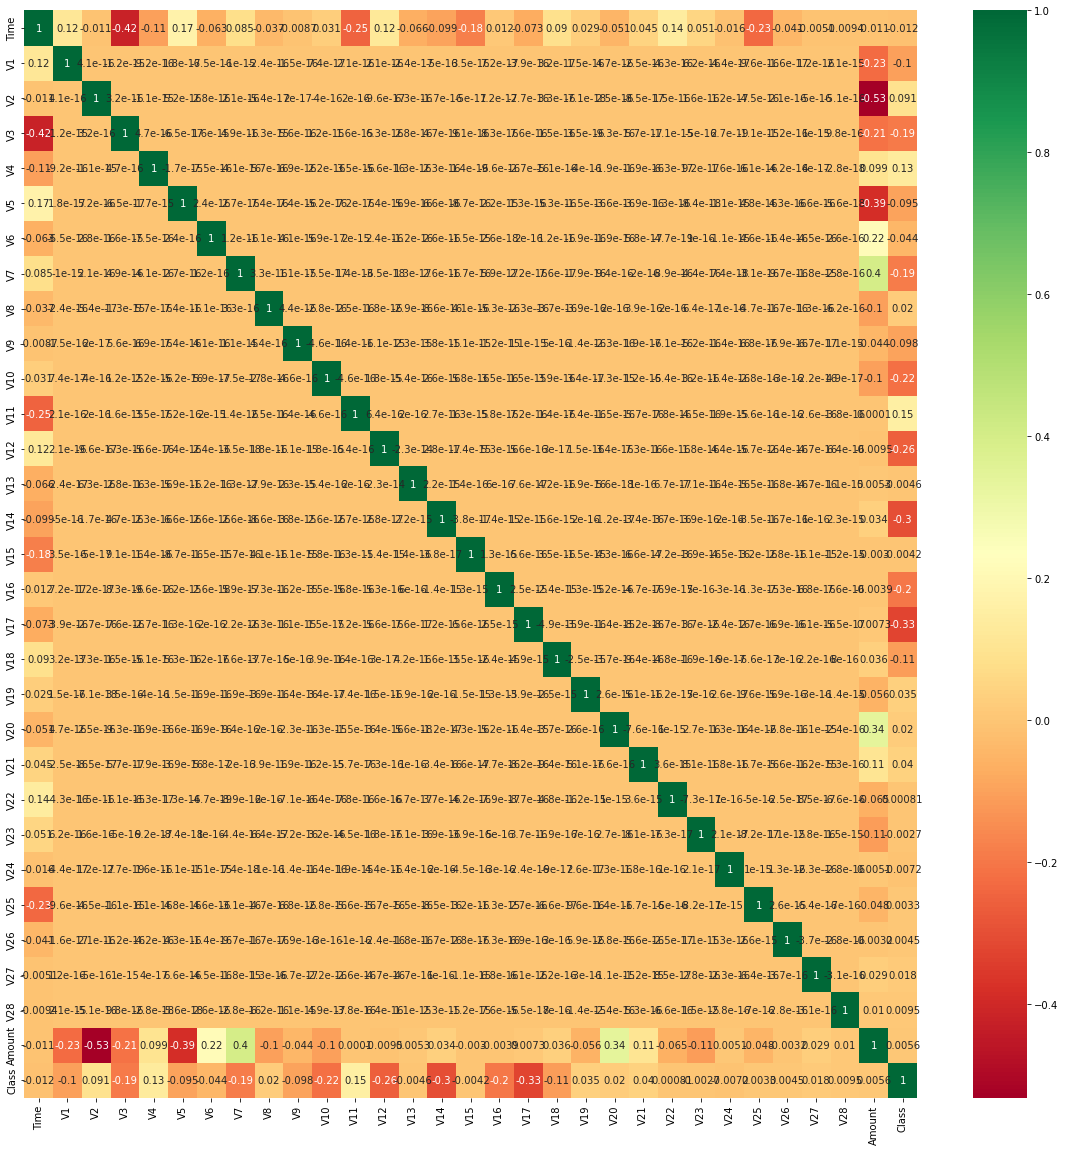

In [11]:
# correlation
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap="RdYlGn", annot = True)
plt.show()

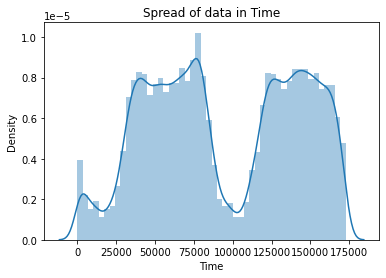

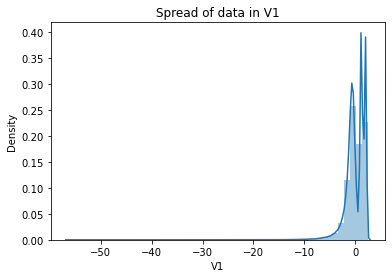

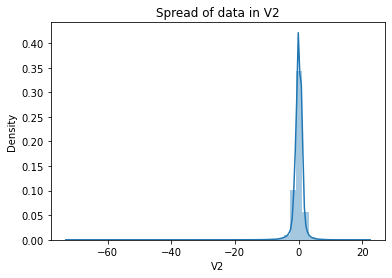

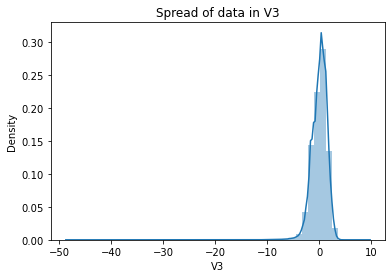

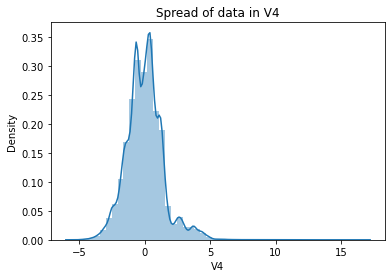

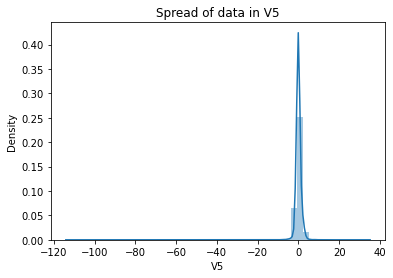

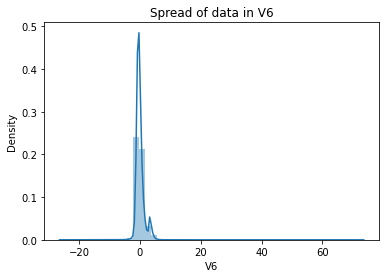

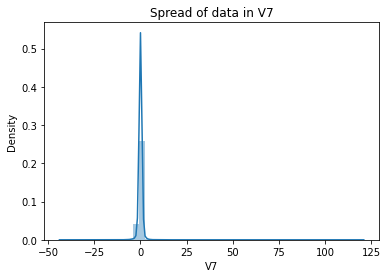

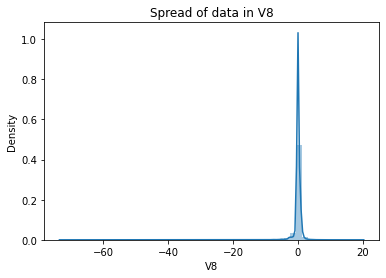

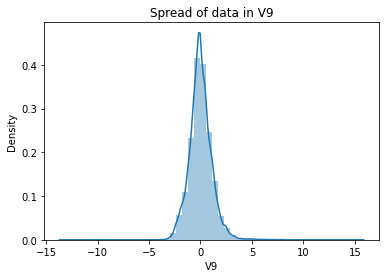

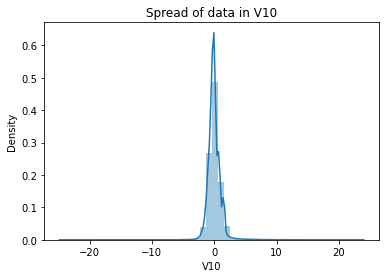

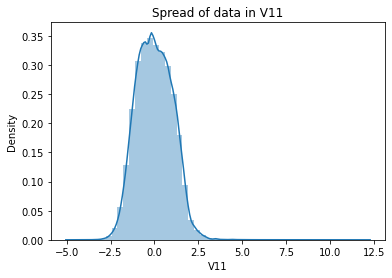

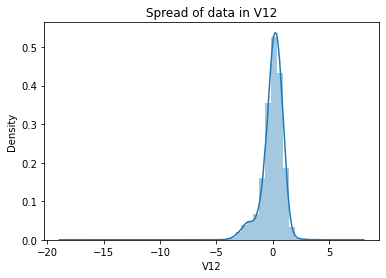

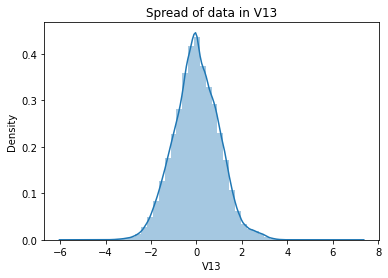

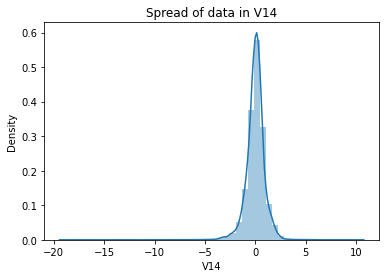

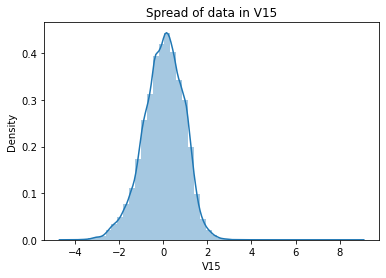

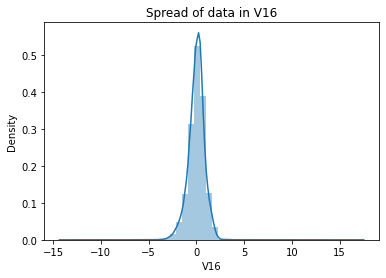

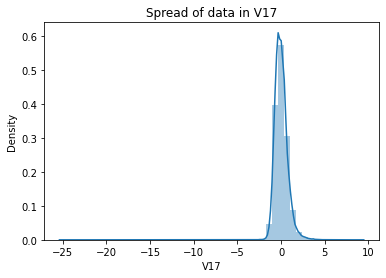

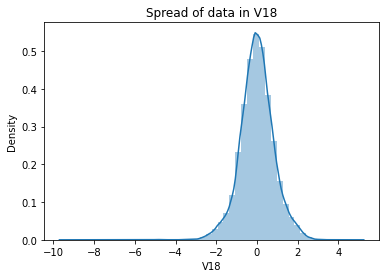

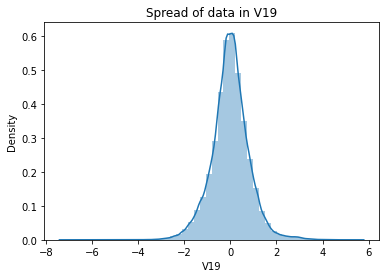

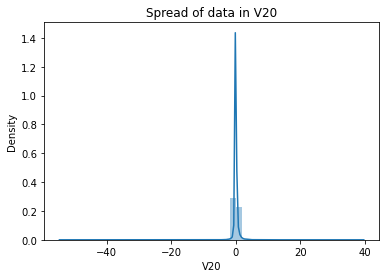

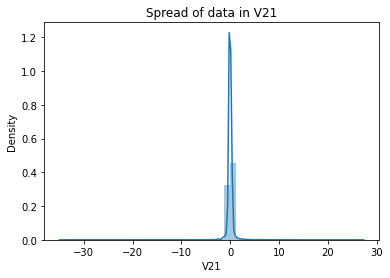

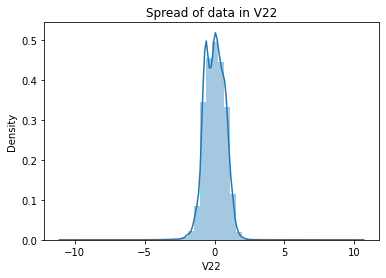

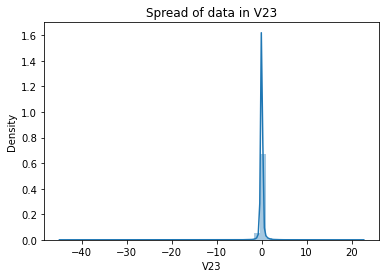

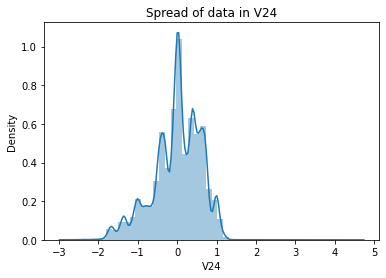

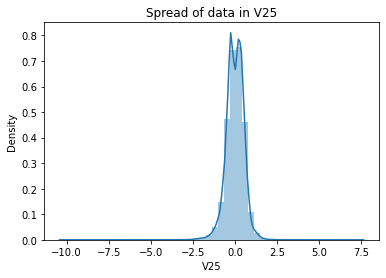

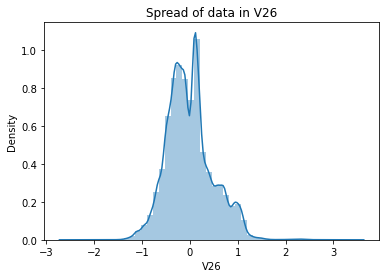

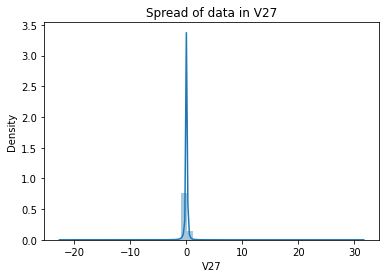

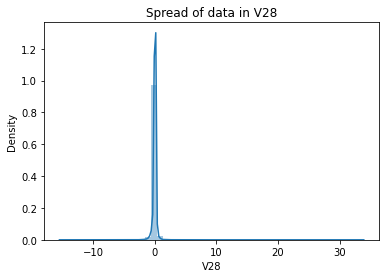

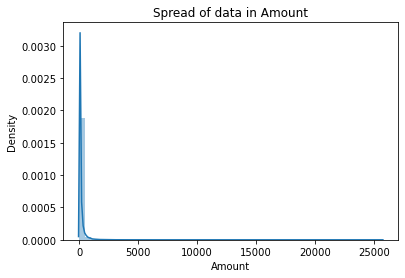

In [12]:
# Data distribution
for i in df.columns:
    if i != 'Class':
        sns.distplot(df[i], kde = True)
        plt.title('Spread of data in'+' '+ i)
        plt.xlabel(i)
        plt.show()

# Data Preparation

In [13]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


### Splitting the data into train & test data

In [14]:
# y= #class variable
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [15]:
# Spltting the data set into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [17]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


In [18]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_train.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,0.000702,-0.000389,-0.000787,0.002718,-0.000493,-0.000059,0.000744,-0.001070,0.000390,0.000056,0.000664,-0.000999,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,-0.000000
std,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,1.097351,1.086252,1.019200,0.996509,0.994103,0.955993,0.915143,0.874243,0.844235,0.838874,0.813931,0.770806,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,1.000002
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.351689
25%,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,-0.640307,-0.535655,-0.761844,-0.401593,-0.648607,-0.425825,-0.582648,-0.469107,-0.483409,-0.499150,-0.455036,-0.211651,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,-0.329194
50%,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,-0.050653,-0.093332,-0.031419,0.142381,-0.014348,0.049571,0.048400,0.065080,-0.065550,-0.003484,0.005351,-0.062606,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,-0.263943
75%,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,0.598254,0.454469,0.737457,0.620148,0.661868,0.492066,0.649549,0.521521,0.400099,0.500425,0.459782,0.132702,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,-0.042622
max,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,102.117000


In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


In [20]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.259954
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.304426
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.048286
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.347741
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.345707


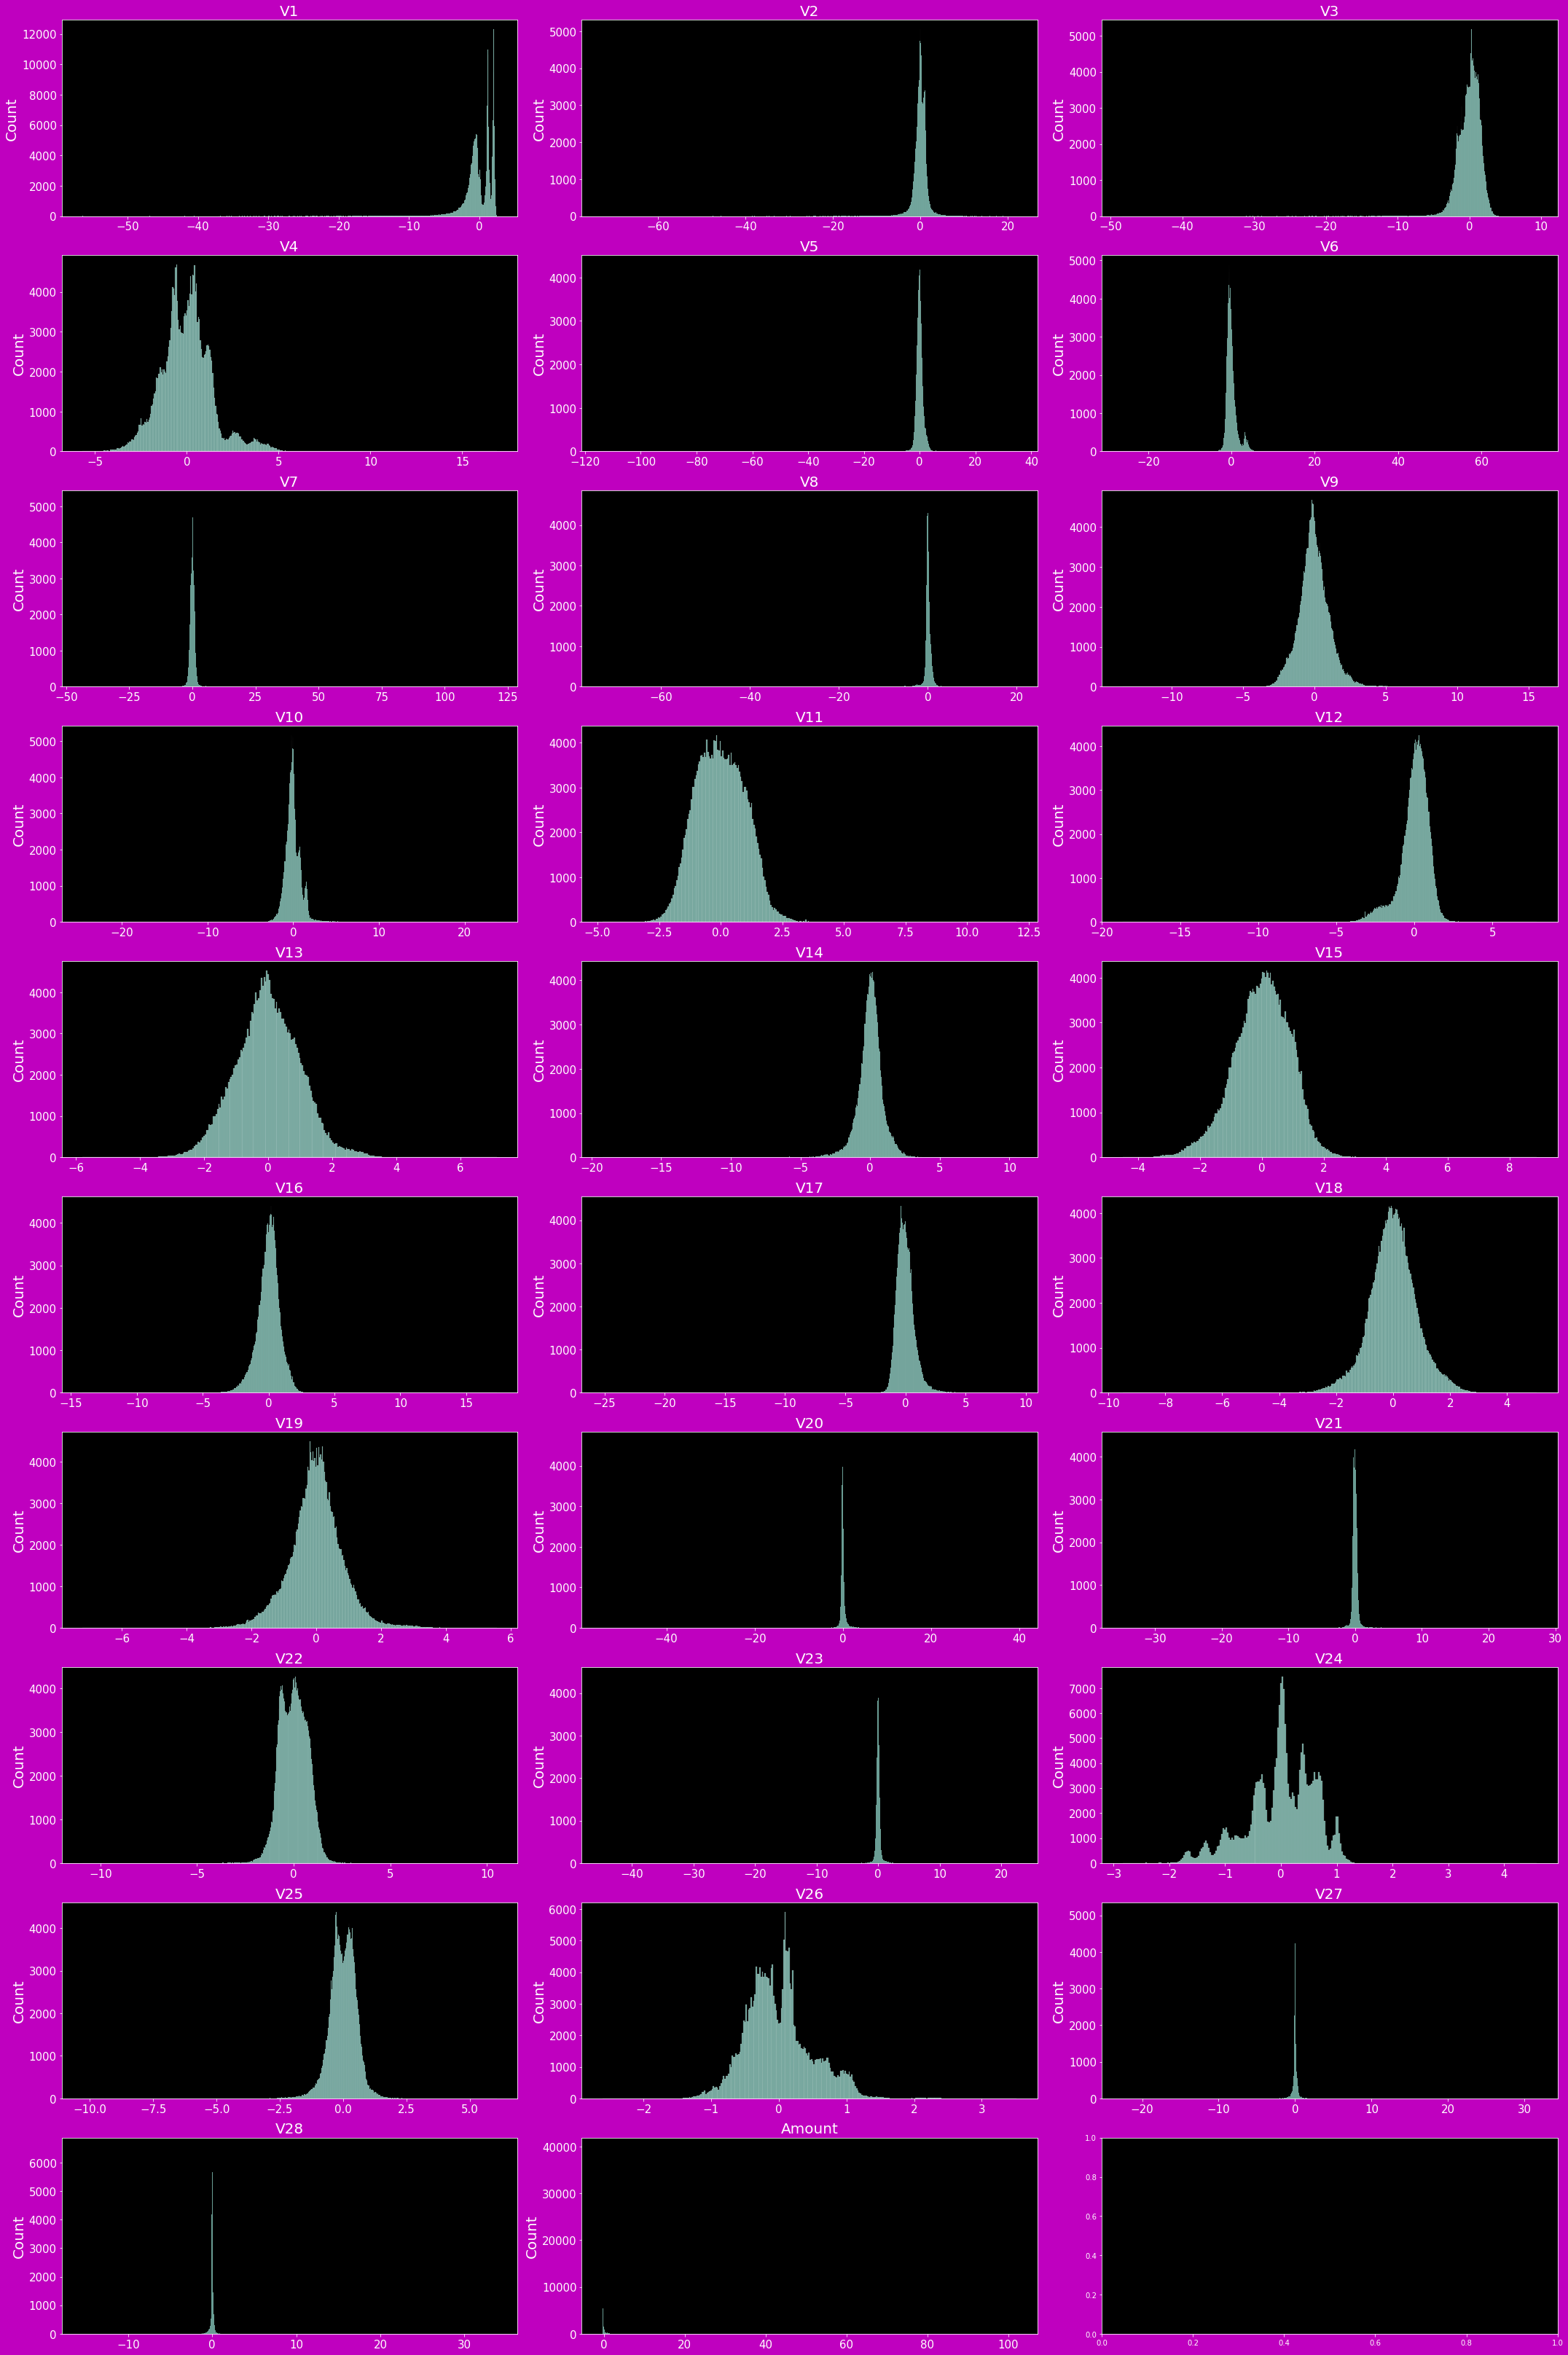

In [21]:
#The code defines a function to plot histograms of the variables in a given dataset to see the skewness.
var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

In [22]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


There is skewness present in the distribution of the above features:

* Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian

In [23]:
# Filtering the features which has skewness less than -1 and greater than +1

skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [24]:
# - Apply : preprocessing.PowerTransformer to fit & transform the train & test data
pt= preprocessing.PowerTransformer(copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [25]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


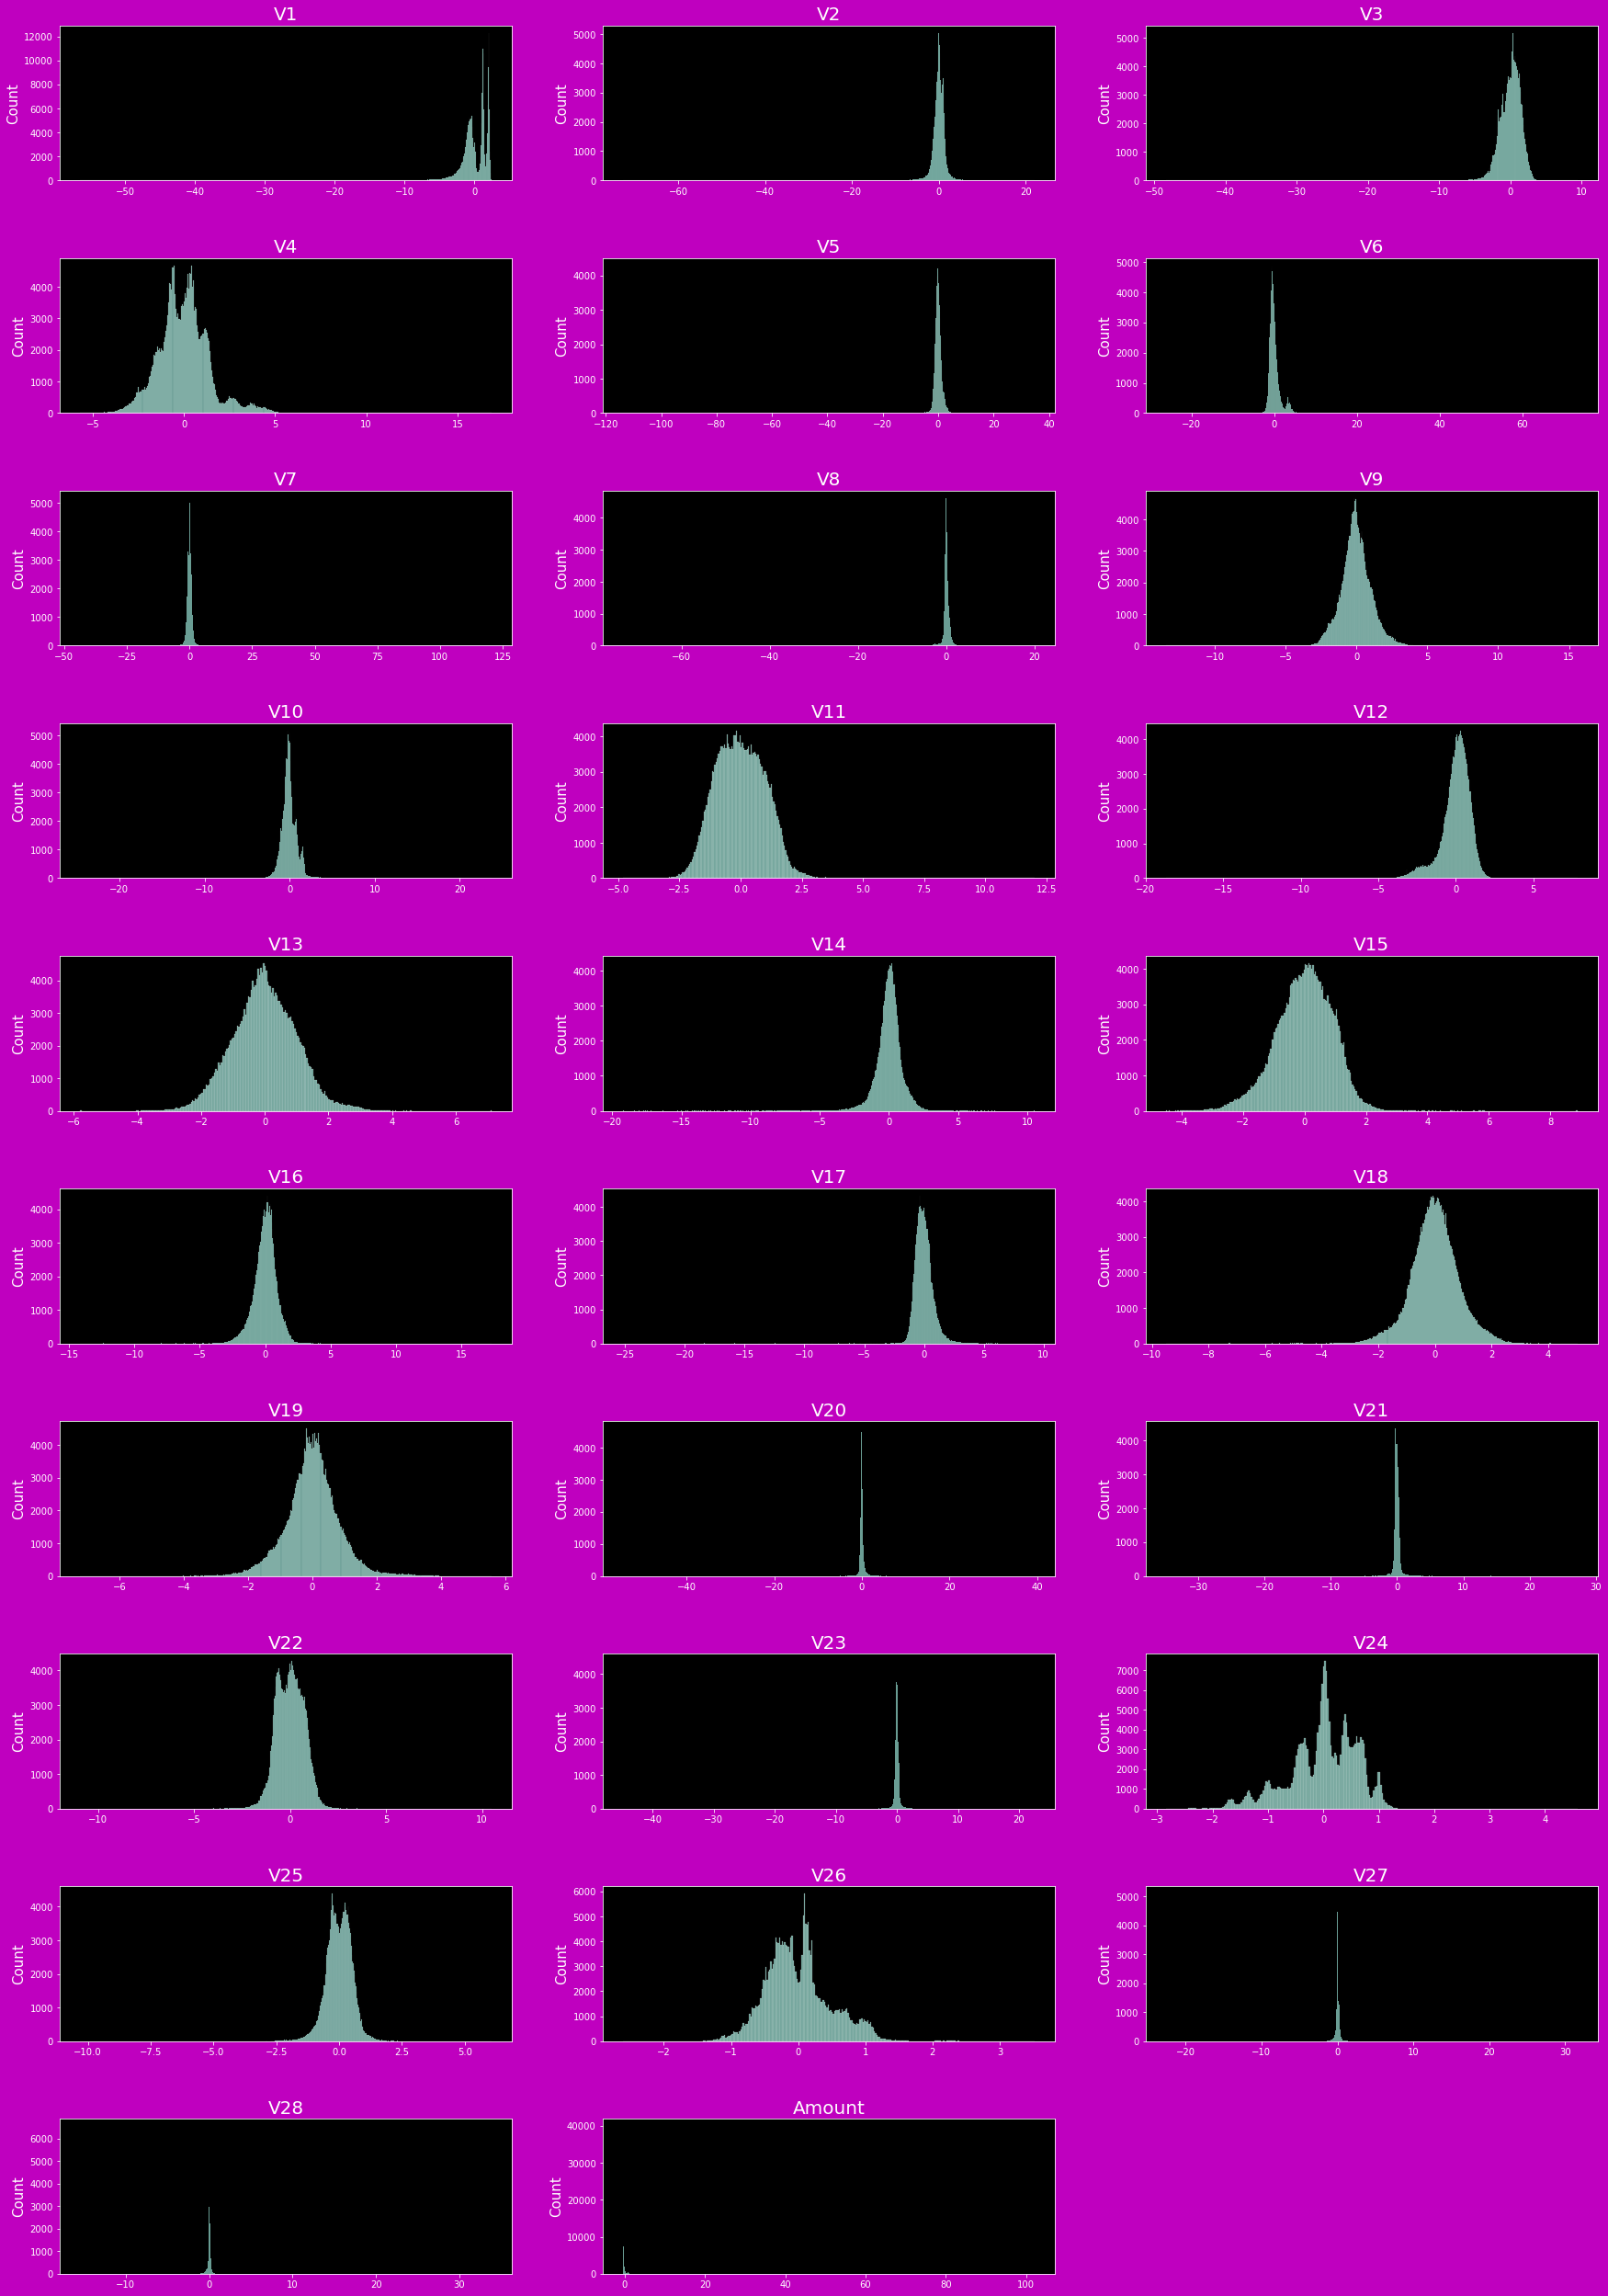

In [26]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize=30) # set main title of the figure
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i) # create subplot
        sns.histplot(X_train[col], ax=ax) # plot histogram
        ax.set_title(col, fontsize=20) # set title of the subplot
        ax.set_ylabel('Count', fontsize=15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace=0.5, wspace=0.2) # add horizontal and vertical space between subplots
    plt.show()

## Model Building with imbalanced data

In [27]:
# Class imbalance
y_train.value_counts()/y_train.shape

0   0.998271
1   0.001729
Name: Class, dtype: float64

In [28]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

# Logistic Regression

#### Logistic Regression + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [29]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters for Stratified K-fold cross vaidation
"""
This code performs hyperparameter tuning using K-fold cross-validation for logistic regression. 
The parameter grid being searched is defined in params, with C being the regularization parameter for logistic regression. 
folds is an object that defines how many folds should be used in cross-validation.
"""

params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Time taken: 11.87 seconds
Best ROC AUC score:  0.9812908744202931
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [30]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9812908744202931
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9798221971886271
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9790949574573552

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.007681175866909223
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.009106451498513114
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.009578570469076588


# KNN Classifier

#### KNN Classifier + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [31]:
# Define the parameter grid for KNN
params = {'n_neighbors': [5, 7, 9], 'metric': ['euclidean', 'manhattan']}
# params = {'n_neighbors': [5, 7, 9], 'metric': ['manhattan']}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Time taken: 4426.63 seconds
Best ROC AUC score:  0.9261860372042235
Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 9}


In [32]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.9237147953664229
{'metric': 'euclidean', 'n_neighbors': 7} 0.9249511085540126
{'metric': 'euclidean', 'n_neighbors': 9} 0.9261771121439722
{'metric': 'manhattan', 'n_neighbors': 5} 0.9211738822245948
{'metric': 'manhattan', 'n_neighbors': 7} 0.9249442084956806
{'metric': 'manhattan', 'n_neighbors': 9} 0.9261860372042235

Rank of each hyperparameter combination:
1 {'metric': 'euclidean', 'n_neighbors': 5}
2 {'metric': 'euclidean', 'n_neighbors': 7}
3 {'metric': 'euclidean', 'n_neighbors': 9}
4 {'metric': 'manhattan', 'n_neighbors': 5}
5 {'metric': 'manhattan', 'n_neighbors': 7}
6 {'metric': 'manhattan', 'n_neighbors': 9}

Standard deviation of test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.008174811069146559
{'metric': 'euclidean', 'n_neighbors': 7} 0.009938722721733347
{'metric': 'euclidean', 'n_neighbors': 9} 0.009497193330414615
{'metric': 'manhattan', 'n_neighbors': 5} 0.006580175442696586
{'metric': 'manhattan'

# 3) Decision Tree

#### DecisionTree + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters to be tuned
params = {'max_depth': [2, 3, 4],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Print the time taken to fit the model
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 174.30 seconds
Best ROC AUC score:  0.9337472016466822
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [34]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 3, 'min_samples_l

# 4) Random Forest

#### Random Forest + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for tuning
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7],
    }

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1,
                        verbose=1,
                        # pre_dispatch=6, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 2610.42 seconds
Best ROC AUC score:  0.9640567803754685
Best hyperparameters:  {'min_samples_split': 7, 'n_estimators': 500}


In [36]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9559290612291047
{'min_samples_split': 7, 'n_estimators': 500} 0.9640567803754685

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.011227437138071714
{'min_samples_split': 7, 'n_estimators': 500} 0.006587077411737011


# 5) XGBoost

#### XGBoost + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [37]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import time

params = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Time taken: 1253.10 seconds
Best ROC AUC score:  0.9859738836378374
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}


In [38]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.9834282429066205
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7} 0.9849601782794145
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9} 0.9805243618051039
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9859738836378374
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7} 0.9806376121572783
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9} 0.978332280891693
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5} 0.983409583243006
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7} 0.9800852444167223
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9} 0.977695793511173
{'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.5} 0.9147684842269266
{'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7} 0.9147946223755623
{'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.9} 0.9147947275093804
{'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.5} 0.9147657632

Proceed with the model which shows the best result

Apply the best hyperparameter on the model
Predict on the test dataset

In [39]:
X_test_saved.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.000000
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.850000
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.070000
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.990000
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.500000


In [40]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [41]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [42]:
X_test_saved.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.266631
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.311646
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.052375
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.355490
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.353431


In [43]:
from sklearn.metrics import f1_score, precision_score, recall_score


# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf.fit(X_train_pt, y_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

LogisticRegression ROC-AUC Score on Test Set = 0.9757554365302679
LogisticRegression F1-Score on Test Set = 0.6553191489361702
LogisticRegression Precision on Test Set = 0.5620437956204379
LogisticRegression Recall on Test Set = 0.7857142857142857
Time taken: 0.98 seconds


In [44]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

KNeighbors Classifier ROC-AUC Score on Test Set = 0.9385737219057572
KNeighbors Classifier F1-Score on Test Set = 0.8314606741573034
KNeighbors Classifier Precision on Test Set = 0.925
KNeighbors Classifier Recall on Test Set = 0.7551020408163265
Time taken: 226.62 seconds


In [45]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9314465304973987
Decision Tree Classifier F1-Score on Test Set = 0.8200000000000001
Decision Tree Classifier Precision on Test Set = 0.803921568627451
Decision Tree Classifier Recall on Test Set = 0.8367346938775511
Time taken: 5.64 seconds


In [46]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=7, n_estimators=500)  
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Random Forest Classifier ROC-AUC Score on Test Set = 0.9592063735314047
Random Forest Classifier F1-Score on Test Set = 0.8121827411167513
Random Forest Classifier Precision on Test Set = 0.8080808080808081
Random Forest Classifier Recall on Test Set = 0.8163265306122449
Time taken: 1353.88 seconds


In [47]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=5, subsample=0.5, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9810906688927682
XGBOOST Classifier F1-Score on Test Set = 0.8159203980099503
XGBOOST Classifier Precision on Test Set = 0.7961165048543689
XGBOOST Classifier Recall on Test Set = 0.8367346938775511
Time taken: 38.61 seconds


### Scores Table

| Model                    | Parameter                                               | ROC-AUC Score | F1-Score   | Precision  | Recall     |
|--------------------------|--------------------------------------------------------|--------------|------------|------------|------------|
| LogisticRegression       | {'C': 0.01, 'penalty': 'l2'}                         | 0.97575543  | 0.65531914 | 0.56204379 | 0.78571428 |
| KNeighborsClassifier     | {'metric': 'manhattan', 'n_neighbors': 9}              | 0.93857372  | 0.83146067 | 0.92500000 | 0.75510204 |
| DecisionTreeClassifier   | {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} | 0.93144653  | 0.82000000 | 0.80392156 | 0.83673469 |
| RandomForestClassifier   | {'min_samples_split': 5, 'n_estimators': 500}          | 0.95920637  | 0.81218274 | 0.80808080 | 0.81632653 |
| XGBClassifier            | {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} | 0.98109066  | 0.81592039 | 0.79611650 | 0.83673469 |


1. `Best model is XGBoostClassifier based on ROC-AUC Score`
2. `Best model is KNeighborsClassifier based on F1 Score`


### Important features list from the best model to understand the data set

Top var = 17
2nd Top var = 14
3rd Top var = 10


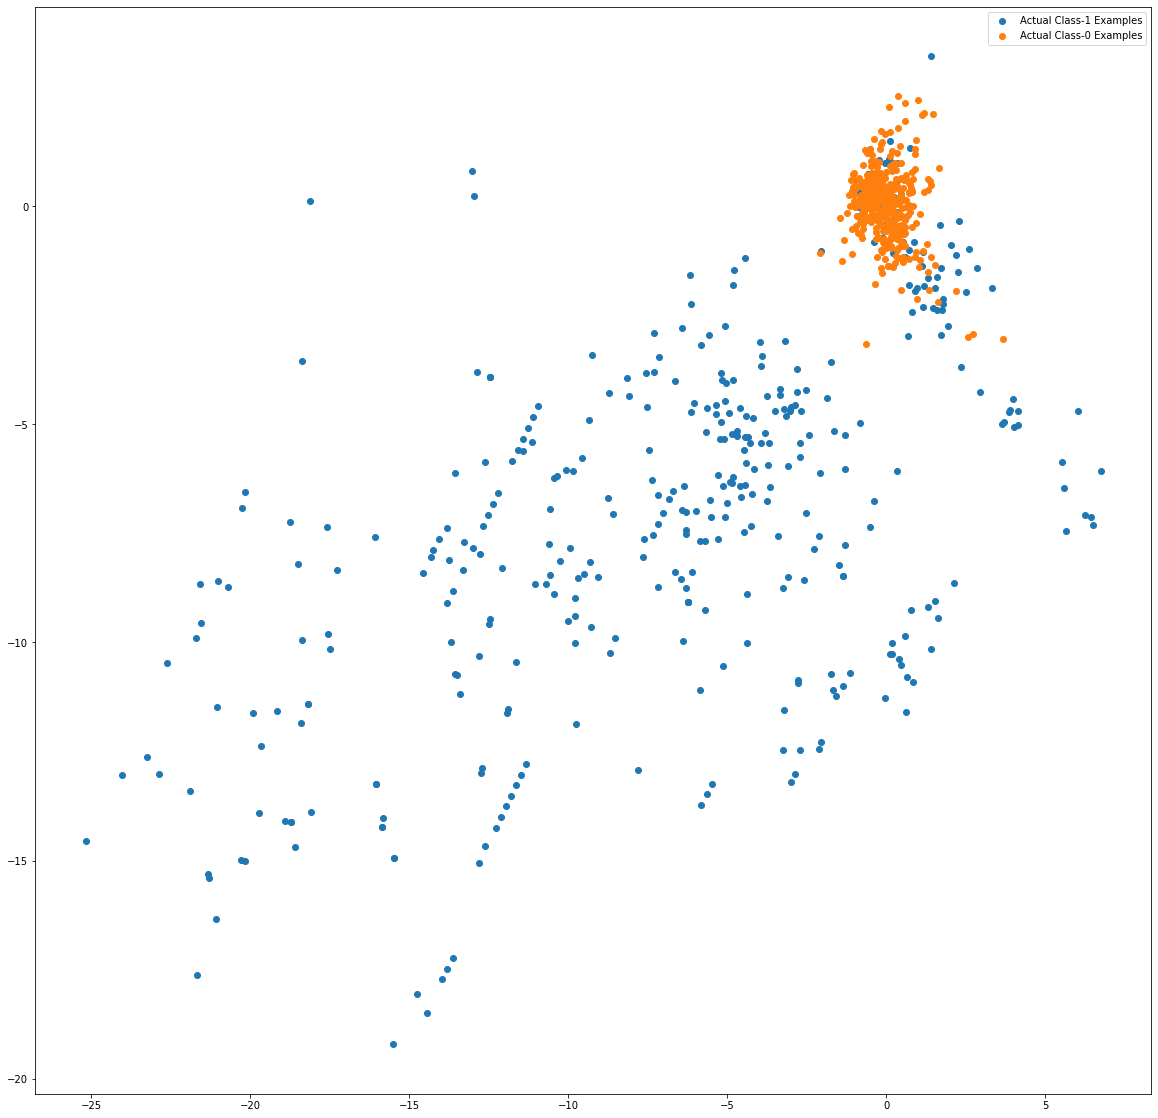

In [48]:
var_imp = []
clf = XGBClassifier(learning_rate=0.1, max_depth=5, subsample=0.5, objective='binary:logistic', eval_metric='auc')
clf.fit(X_train_pt, y_train_pt)
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Model building with balanced data sets

- Build different models on the balanced dataset and see the result :

I. Random Oversampling

II. SMOTE

III. ADASYN

#### I. Random Oversampling

In [49]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [50]:
from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data using RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

### Class distribution after applying Random Oversampling

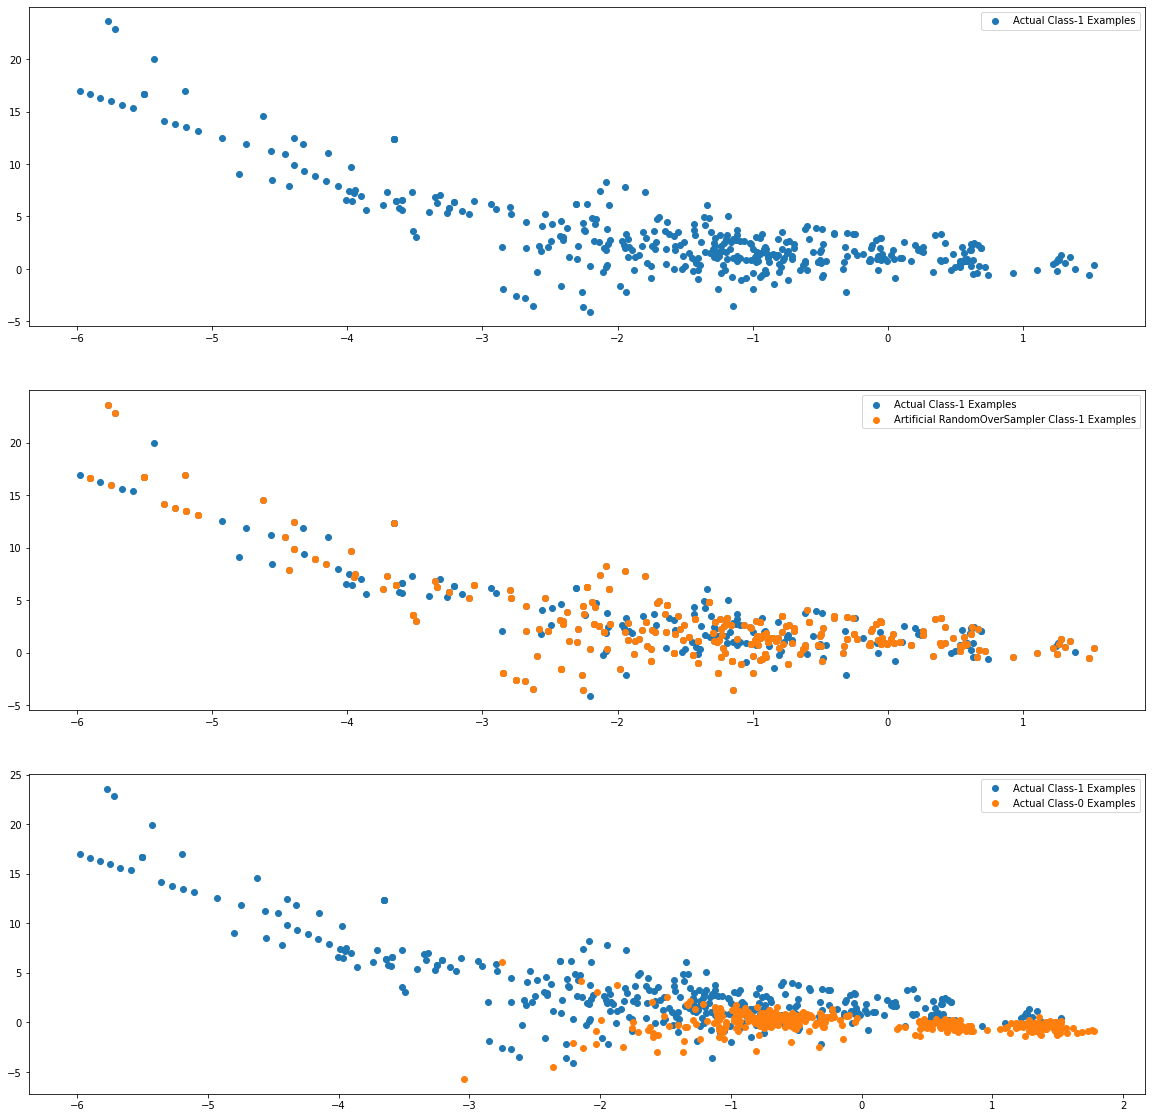

In [51]:
X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [52]:
print(y_ros_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


# 1) Logistic Regression

#### `Logistic Regression + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 24.11 seconds
Best ROC AUC score:  0.9884770105178832
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [54]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9883149371443926
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9884595421461327
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9884740564426938
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9884763216666569
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9884766591625856
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9884770105178832

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 9.013065666823894e-05
{'C

# KNN Classifier

#### `KNN Classifier + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the KNN parameters for Stratified K-fold cross-validation
params = {'n_neighbors': [9]}

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 1287.42 seconds
Best ROC AUC score:  0.999839525875903
Best hyperparameters:  {'n_neighbors': 9}


In [56]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'n_neighbors': 9} 0.999839525875903

Rank of each hyperparameter combination:
1 {'n_neighbors': 9}

Standard deviation of test scores:
{'n_neighbors': 9} 3.9690900645166046e-05


# 3. Decision Tree

#### `Decision Tree + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 397.67 seconds
Best ROC AUC score:  0.9981460788751075
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [58]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 5, 'min_

# 4) Random Forest

#### `Random Forest + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 2707.30 seconds
Best ROC AUC score:  1.0
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [60]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 1.0
{'min_samples_split': 7, 'n_estimators': 500} 1.0

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 6.409875621278546e-17
{'min_samples_split': 7, 'n_estimators': 500} 0.0


# 5) XGBOOST

#### `XGBoost + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [61]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.5, 0.6, 0.7],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)



# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 2783.93 seconds
Best ROC AUC score:  0.9999960678244962
Best hyperparameters:  {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7}


In [62]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.5} 0.9999836936986387
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.7} 0.9999796543304846
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.9} 0.9999794728829313
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.5} 0.9999883564774423
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.7} 0.999986599816932
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.9} 0.9999888505146527
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.5} 0.9999911747134197
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.7} 0.9999914432314433
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.9} 0.999990174722261
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.5} 0.9999799684568499
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.7} 0.9999874020366363
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.9} 0.9999843247928296
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.5} 0.9999913753263

In [63]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

In [64]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)  
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

LogisticRegression ROC-AUC Score on Test Set = 0.9711446999494139
LogisticRegression F1-Score on Test Set = 0.9333531452945135
LogisticRegression Precision on Test Set = 0.9278303936050047
LogisticRegression Recall on Test Set = 0.9389420371412492
Time taken: 2.63 seconds


In [65]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9)  
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

KNeighbors Classifier ROC-AUC Score on Test Set = 0.9398414623652889
KNeighbors Classifier F1-Score on Test Set = 0.9183417562792111
KNeighbors Classifier Precision on Test Set = 0.9985951574250062
KNeighbors Classifier Recall on Test Set = 0.8500281373100732
Time taken: 190.61 seconds


In [66]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4, min_samples_split=2)   
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9011688557774136
Decision Tree Classifier F1-Score on Test Set = 0.8746107195541714
Decision Tree Classifier Precision on Test Set = 0.9680490043327001
Decision Tree Classifier Recall on Test Set = 0.7976223972988182
Time taken: 12.63 seconds


In [67]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Random Forest Classifier ROC-AUC Score on Test Set = 0.9683210218705635
Random Forest Classifier F1-Score on Test Set = 0.8416904276985743
Random Forest Classifier Precision on Test Set = 0.9997822721114766
Random Forest Classifier Recall on Test Set = 0.7267691333708497
Time taken: 1359.42 seconds


In [68]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.6, max_depth=5, subsample=0.7, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9673007700658843
XGBOOST Classifier F1-Score on Test Set = 0.9247009015479409
XGBOOST Classifier Precision on Test Set = 0.9994076071413981
XGBOOST Classifier Recall on Test Set = 0.8603861845807541
Time taken: 62.82 seconds


### Table of Scores

| Model | Parameter | ROC-AUC Score | F1-Score | Precision |	Recall |
|---|---|---|---|---|---|
| LogisticRegression | {'C': 4, 'penalty': 'l2'} | 0.97114469 | 0.93335314 | 0.92783039 | 0.93894203 |
| KNeighborsClassifier |	{'n_neighbors': 9} | 0.93984146 | 0.91834175 | 0.99859515 | 0.85002813 |
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} | 0.90116885 | 0.87461071 | 0.96804900 | 0.79762239 |
| RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500} | 0.96832102 | 0.84169042 | 0.99978227 | 0.72676913 |
| XGBClassifier | {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} | 0.96730077 | 0.92470090 | 0.99940760 | 0.86038618 |

Based on ROC-AUC Scores
- All models scores decreases after oversampling. But, the best model is RandomForestClassifier.

Based on F1 Scores
- LogisticRegression, KNeighborsClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.
DecisionTreeClassifier scores decreases. But, the best model is LogisticRegression

Top var = 14
2nd Top var = 4
3rd Top var = 10


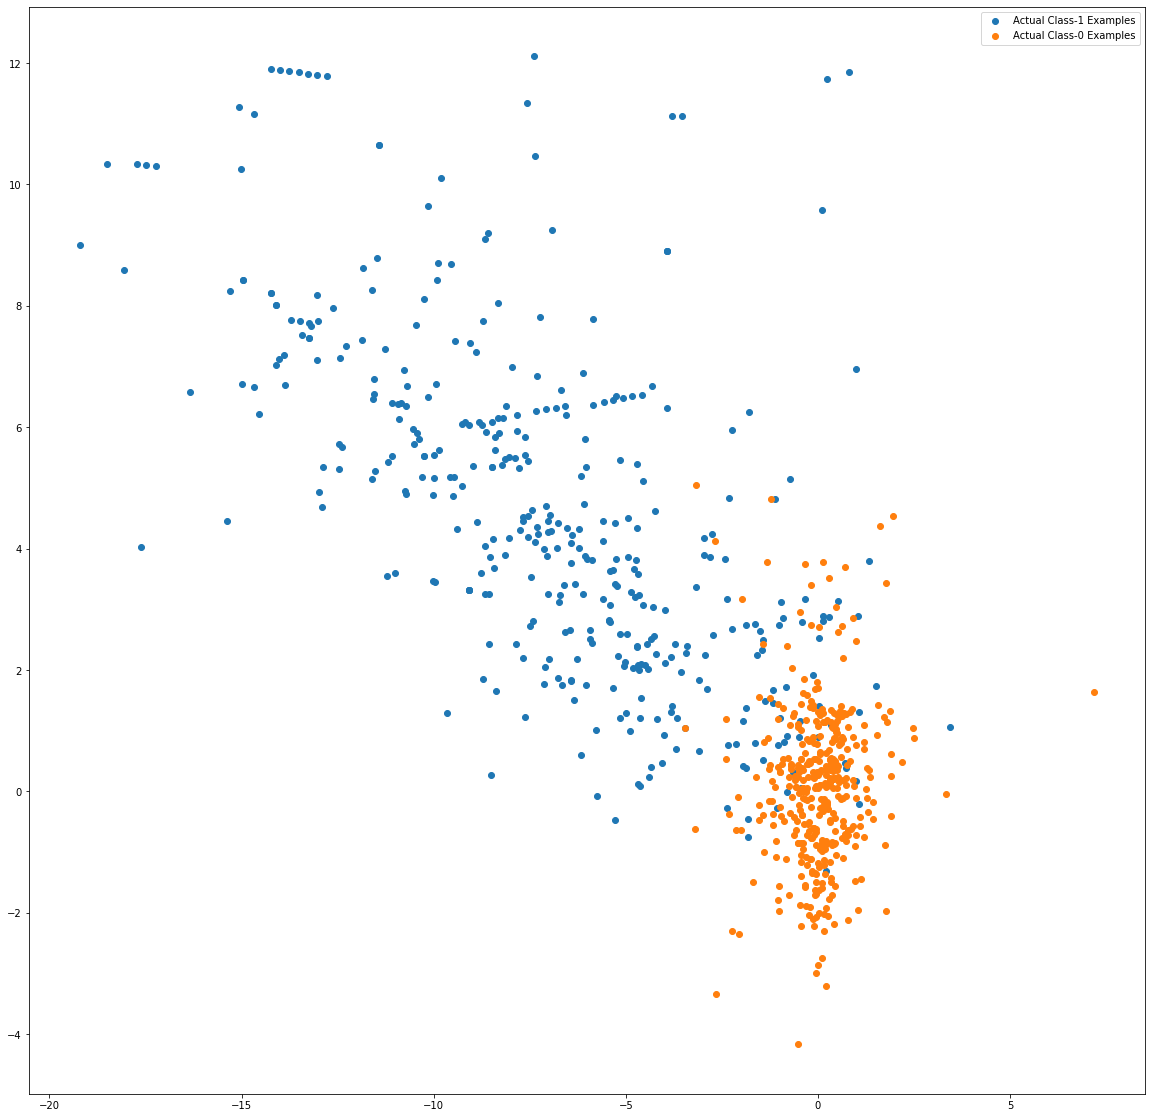

In [69]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# II) SMOTE

Synthetic Minority Over-sampling Technique

Build different models on the balanced dataset and see the result

In [70]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using SMOTE
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

#### Class distribution after applying SMOTE 

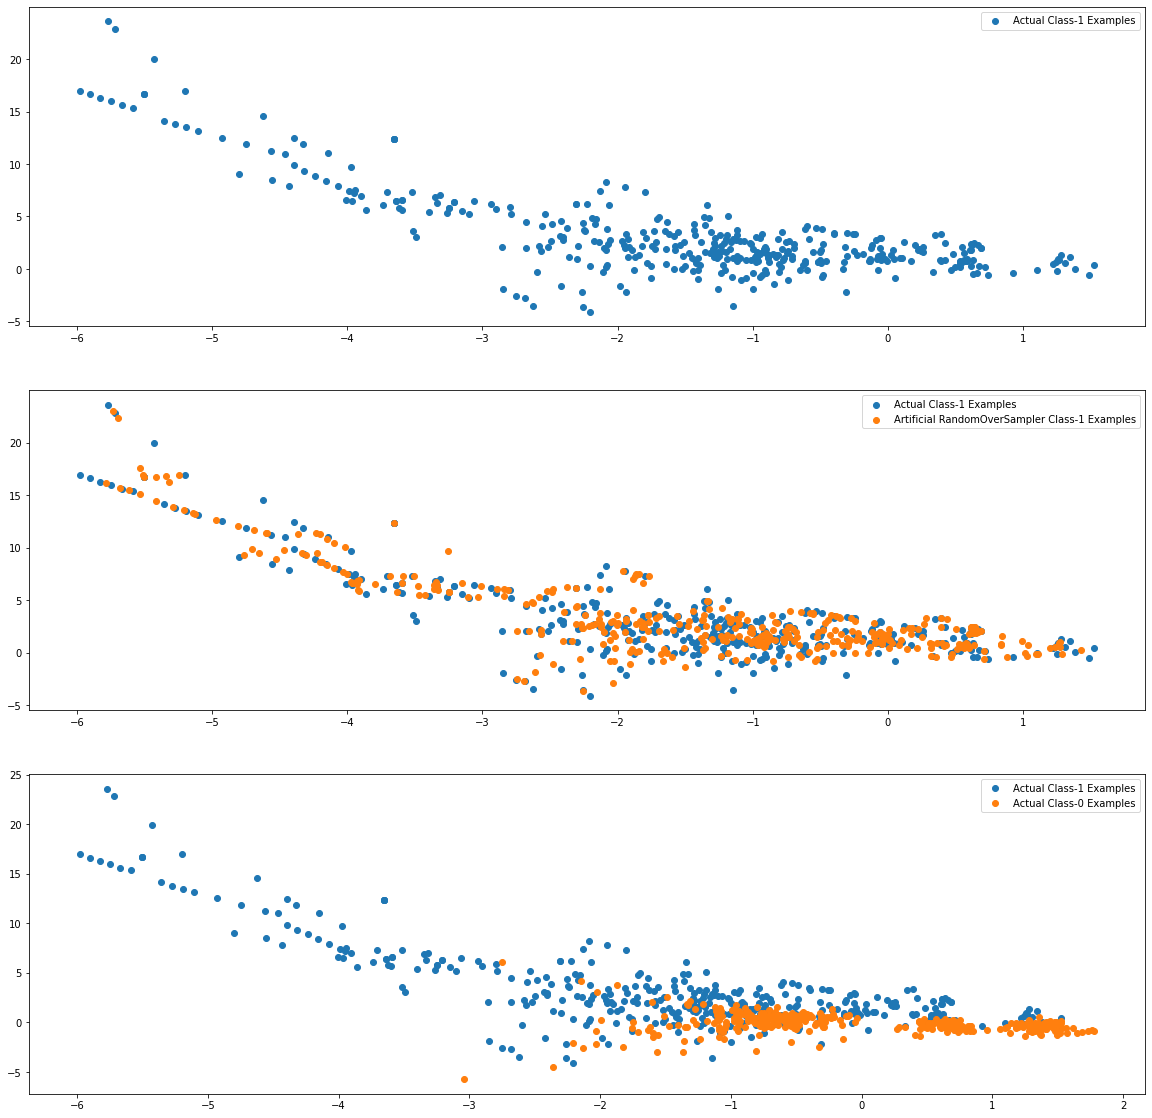

In [71]:
X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [72]:
print(y_smote_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


Build models on other algorithms to see the better performing on SMOTE

# 1) Logistic Regression

#### `Logistic Regression + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 24.26 seconds
Best ROC AUC score:  0.9904399410590917
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [74]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9903017687761443
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9904256456709722
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9904373204206017
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9904388098098514
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9904395747426343
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9904399410590917

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.00011711403382754498
{'

# 2) KNN Classifier

#### `KNN Classifier + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the KNN parameters for Stratified K-fold cross-validation
params = {'n_neighbors': [9]}

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 1255.70 seconds
Best ROC AUC score:  0.9995712766601619
Best hyperparameters:  {'n_neighbors': 9}


In [76]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'n_neighbors': 9} 0.9995712766601619

Rank of each hyperparameter combination:
1 {'n_neighbors': 9}

Standard deviation of test scores:
{'n_neighbors': 9} 3.7348159266749165e-05


# 3) Decision Tree

#### `Decision Tree + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 374.88 seconds
Best ROC AUC score:  0.994313464931366
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [79]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9789083867479486
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9789083867479486
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9789083867479486
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9789079221111567
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9789079221111567
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9789079221111567
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9789079094115675
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9789079094115675
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9789079094115675
{'criterion': 'gini', 'max_depth': 5, 'min_

# 4) Random Forest

#### `Random Forest + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [80]:
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 6399.96 seconds
Best ROC AUC score:  0.9999983311638171
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [81]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9999983311638171
{'min_samples_split': 7, 'n_estimators': 500} 0.9999979052926656

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 1.0797041179470273e-06
{'min_samples_split': 7, 'n_estimators': 500} 1.3570521118447493e-06


# 5) XGBoost

#### `XGBoost + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [82]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 3750.84 seconds
Best ROC AUC score:  0.9999903457607905
Best hyperparameters:  {'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9}


In [83]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.5} 0.9999756451456007
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7} 0.9999696975917027
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.9} 0.9999700800290996
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.5} 0.999990270781025
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.7} 0.9999890870517478
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} 0.9999831923258208
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.5} 0.9999846101276608
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.7} 0.9999871358671667
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9} 0.9999903457607905
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.5} 0.999969109003442
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.7} 0.9999725049837388
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.9} 0.9999683192513711
{'learning_rate': 1, 'max_depth': 5, 'subsample': 0.5} 0.999981969830903
{'lea

In [84]:
# Define the RandomOverSampler
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using RandomOverSampler
X_test_saved_smote, y_test_saved_smote = smote.fit_resample(X_test_saved,y_test_saved)

In [85]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)  
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

LogisticRegression ROC-AUC Score on Test Set = 0.9700298850925577
LogisticRegression F1-Score on Test Set = 0.9239631740464708
LogisticRegression Precision on Test Set = 0.921361871786801
LogisticRegression Recall on Test Set = 0.926579206527856
Time taken: 2.73 seconds


In [86]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9)  
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

KNeighbors Classifier ROC-AUC Score on Test Set = 0.9540881017593559
KNeighbors Classifier F1-Score on Test Set = 0.9410379544991008
KNeighbors Classifier Precision on Test Set = 0.9951178385161367
KNeighbors Classifier Recall on Test Set = 0.892533061339336
Time taken: 1063.25 seconds


In [87]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4, min_samples_split=2)   
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9452290797771021
Decision Tree Classifier F1-Score on Test Set = 0.9253289203002569
Decision Tree Classifier Precision on Test Set = 0.9637014607019749
Decision Tree Classifier Recall on Test Set = 0.8898951885199775
Time taken: 40.28 seconds


In [88]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Random Forest Classifier ROC-AUC Score on Test Set = 0.9809439532198715
Random Forest Classifier F1-Score on Test Set = 0.8835059135299602
Random Forest Classifier Precision on Test Set = 0.9997112458630417
Random Forest Classifier Recall on Test Set = 0.7915025323579066
Time taken: 3206.58 seconds


In [89]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=7, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

XGBOOST Classifier ROC-AUC Score on Test Set = 0.988484223266646
XGBOOST Classifier F1-Score on Test Set = 0.9278907212809393
XGBOOST Classifier Precision on Test Set = 0.9976331600347945
XGBOOST Classifier Recall on Test Set = 0.8672622397298818
Time taken: 90.41 seconds


### Table Scores ###

| Model | Parameter | ROC-AUC Score | F1-Score | Precision |	Recall |
|---|---|---|---|---|---|
| LogisticRegression | {'C': 4, 'penalty': 'l2'} | 0.97002988 | 0.92396317 | 0.92136187 | 0.92657920 |
| KNeighborsClassifier |	{'n_neighbors': 9} | 0.95408810 | 0.94103795 | 0.99511783 | 0.89253306 |
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} | 0.94522907 | 0.92532892 | 0.96370146 | 0.88989518 |
| RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500} | 0.98094395 | 0.88350591 | 0.99971124 | 0.79150253 |
| XGBClassifier | {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} | 0.98848422 | 0.92789072 | 0.99763316 | 0.86726223 |

Top var = 14
2nd Top var = 4
3rd Top var = 12


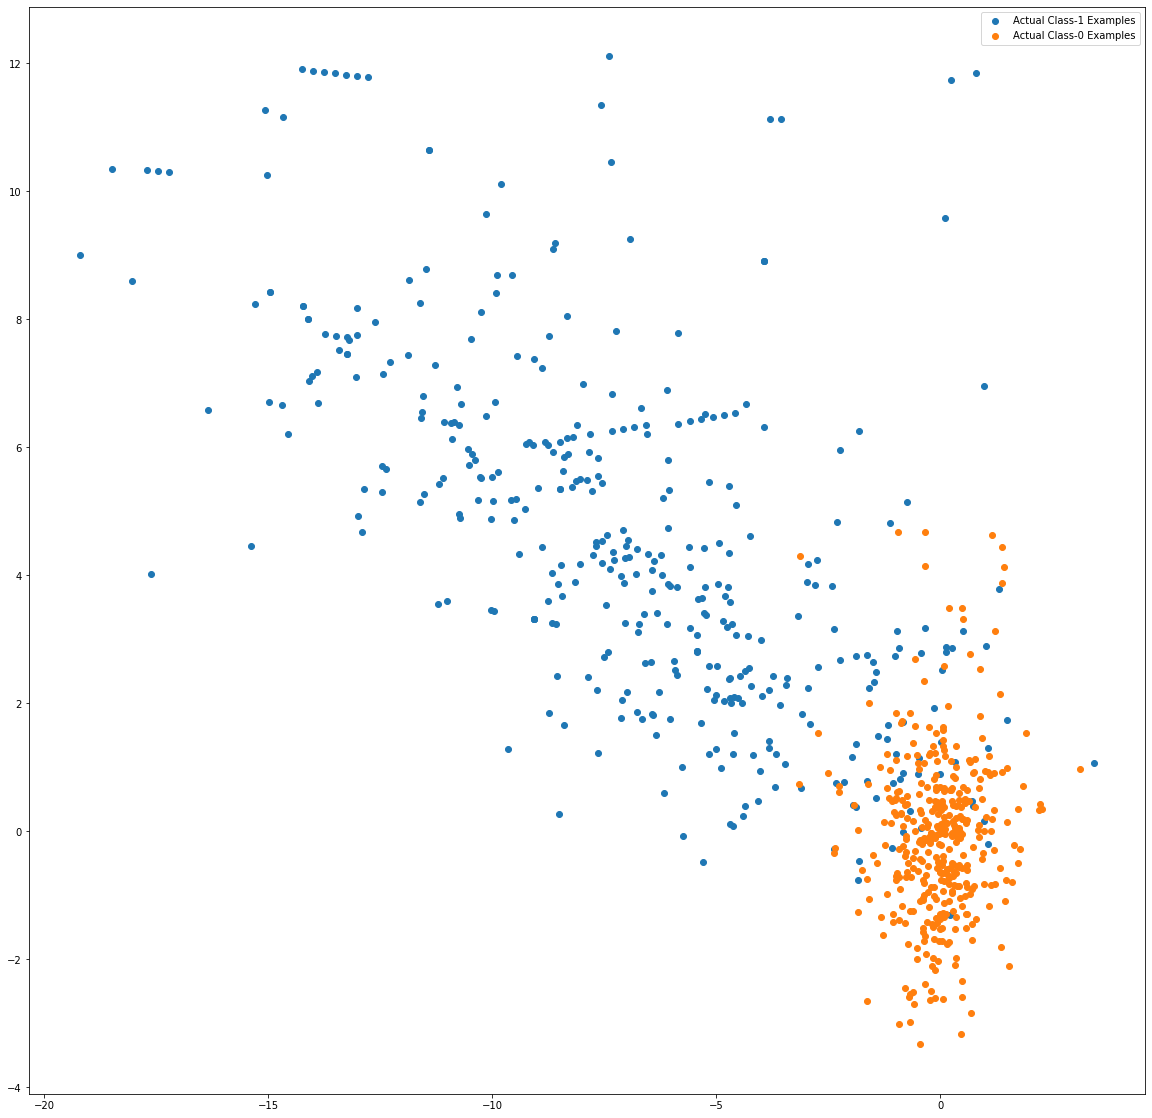

In [90]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# III) ADASYN

In [91]:
from imblearn.over_sampling import ADASYN
from imblearn import over_sampling

In [92]:
# Define the ADASYN
ada = over_sampling.ADASYN(random_state=0)

# Resample the training data using ADASYN
X_adasyn_train_pt, y_adasyn_train_pt = ada.fit_resample(X_train_pt, y_train_pt)

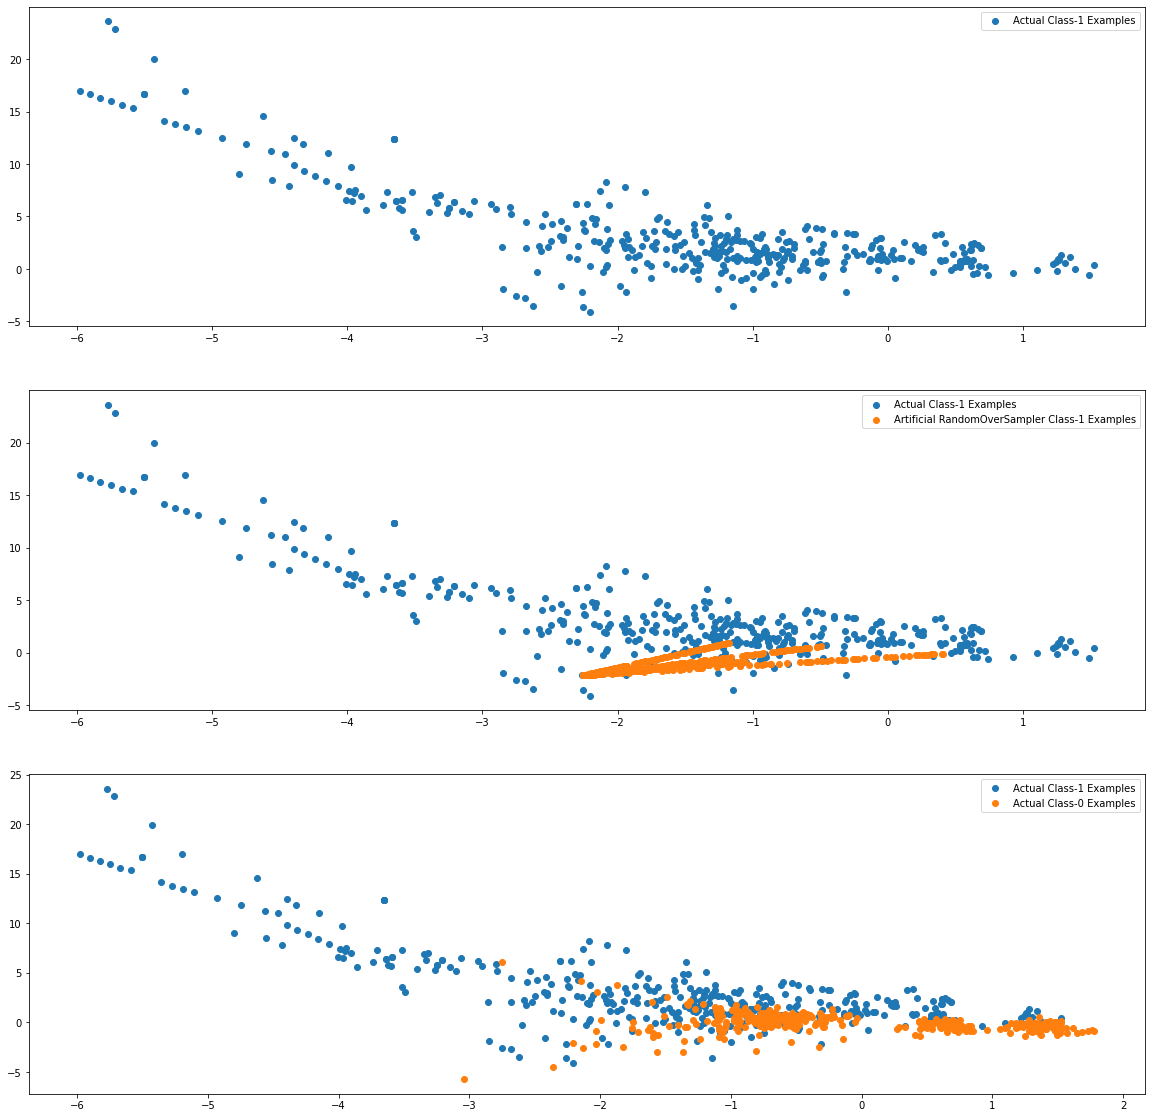

In [93]:
X_adasyn_train_pt_1 = X_adasyn_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 0], X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [94]:
print(y_adasyn_train_pt.value_counts())

1    227458
0    227451
Name: Class, dtype: int64


# 1. Logistic Regression

#### `Logistic Regression + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 19.75 seconds
Best ROC AUC score:  0.957758154480547
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [96]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9575487944256773
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9577422921413133
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9577542578277632
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9577561055760485
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9577578613569407
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.957758154480547

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.013015043993613381
{'C':

# 2. KNN Classifier

#### `KNN Classifier + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the KNN parameters for Stratified K-fold cross-validation
params = {'n_neighbors': [9]}

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 957.81 seconds
Best ROC AUC score:  0.9880482372541852
Best hyperparameters:  {'n_neighbors': 9}


In [98]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'n_neighbors': 9} 0.9880482372541852

Rank of each hyperparameter combination:
1 {'n_neighbors': 9}

Standard deviation of test scores:
{'n_neighbors': 9} 0.004966451175758196


# 3. Decision Tree

#### `Decision Tree + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Time taken: 204.19 seconds
Best ROC AUC score:  0.9455286259074778
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [100]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9355067839083832
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9355067839083832
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9355067839083832
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9355222858994278
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9355222858994278
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9355222858994278
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9355227878469906
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9355227878469906
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9355227878469906
{'criterion': 'entropy', 'max_depth': 6, 'm

# 4. Random Forest

#### `Random Forest + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_) 

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 4271.53 seconds
Best ROC AUC score:  0.9987879690375174
Best hyperparameters:  {'min_samples_split': 7, 'n_estimators': 500}


In [102]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9986709937621928
{'min_samples_split': 7, 'n_estimators': 500} 0.9987879690375174

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.0006902744049443958
{'min_samples_split': 7, 'n_estimators': 500} 0.0004937022413430296


# 5. XGBOOST

#### `XGBoost + Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [103]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 3509.26 seconds
Best ROC AUC score:  0.9990201398657456
Best hyperparameters:  {'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9}


In [104]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.5} 0.9927695681656475
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7} 0.9955165476330965
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.9} 0.9960477833731026
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.5} 0.9982362717934854
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.7} 0.9983766004926746
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} 0.9989260283048172
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.5} 0.9985459016306107
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.7} 0.9990119896097207
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9} 0.9990201398657456
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.5} 0.9947166713548619
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.7} 0.9963836328212187
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.9} 0.9949934143042224
{'learning_rate': 1, 'max_depth': 5, 'subsample': 0.5} 0.9987765714496798
{'

In [105]:
# Define the ADASYN
ada = over_sampling.ADASYN(random_state=0)

# Resample the training data using ADASYN
X_test_saved_adasyn, y_test_saved_adasyn = ada.fit_resample(X_test_saved,y_test_saved)

In [106]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)  
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

LogisticRegression ROC-AUC Score on Test Set = 0.9137020562711073
LogisticRegression F1-Score on Test Set = 0.8282064766862471
LogisticRegression Precision on Test Set = 0.8398322396370013
LogisticRegression Recall on Test Set = 0.8168981888517672
Time taken: 1.81 seconds


In [107]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9)  
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

KNeighbors Classifier ROC-AUC Score on Test Set = 0.8690922886206227
KNeighbors Classifier F1-Score on Test Set = 0.8220130848451077
KNeighbors Classifier Precision on Test Set = 0.9948296533120192
KNeighbors Classifier Recall on Test Set = 0.7003516792685072
Time taken: 169.79 seconds


In [108]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 1, min_samples_split = 2)   
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Decision Tree Classifier ROC-AUC Score on Test Set = 0.8526313292373023
Decision Tree Classifier F1-Score on Test Set = 0.7882491186839014
Decision Tree Classifier Precision on Test Set = 0.8894585635359116
Decision Tree Classifier Recall on Test Set = 0.7077193599437314
Time taken: 16.36 seconds


In [115]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=7, n_estimators=500)  
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Random Forest Classifier ROC-AUC Score on Test Set = 0.9545935605883316
Random Forest Classifier F1-Score on Test Set = 0.6553118055883882
Random Forest Classifier Precision on Test Set = 0.9995312612677579
Random Forest Classifier Recall on Test Set = 0.4874450501142958
Time taken: 1480.31 seconds


In [116]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=7, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9513284218360667
XGBOOST Classifier F1-Score on Test Set = 0.7747011780892596
XGBOOST Classifier Precision on Test Set = 0.9965156794425087
XGBOOST Classifier Recall on Test Set = 0.6336557059961315
Time taken: 86.93 seconds


### Table of Scores 

| Model	| Parameter	| ROC-AUC Score	| F1-Score	| Precision	| Recall |
|---|---|---|---|---|---|
| LogisticRegression | {'C': 4, 'penalty': 'l2'}  |	0.91737438 | 0.82820647 | 0.83983223 | 0.81689818 |
| KNeighborsClassifier | {'n_neighbors': 9} | 0.86909228 | 0.82201308 | 0.99482965	| 0.70035167 |
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} | 0.85263132 | 0.78824911	| 0.88945856	| 0.70771935 |
| RandomForestClassifier | {'min_samples_split': 7, 'n_estimators': 500} | 0.95459356 | 0.65531180 |0.99953126	| 0.48744505 |
| XGBClassifier | {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} | 0.95132842 | 0.77470117	| 0.99651567	| 0.63365570 |

In [117]:
clf.feature_importances_

array([0.03019972, 0.02160278, 0.0216403 , 0.10945134, 0.03475749,
       0.00550059, 0.04888282, 0.04972513, 0.01834406, 0.01054316,
       0.0161189 , 0.03850744, 0.0222574 , 0.3069636 , 0.0136833 ,
       0.02122818, 0.01474183, 0.02390669, 0.0085137 , 0.03654035,
       0.01229234, 0.00609712, 0.0127405 , 0.01601039, 0.02446753,
       0.03913438, 0.00596795, 0.00750549, 0.02267563], dtype=float32)

In [118]:
np.sort(clf.feature_importances_)

array([0.00550059, 0.00596795, 0.00609712, 0.00750549, 0.0085137 ,
       0.01054316, 0.01229234, 0.0127405 , 0.0136833 , 0.01474183,
       0.01601039, 0.0161189 , 0.01834406, 0.02122818, 0.02160278,
       0.0216403 , 0.0222574 , 0.02267563, 0.02390669, 0.02446753,
       0.03019972, 0.03475749, 0.03654035, 0.03850744, 0.03913438,
       0.04888282, 0.04972513, 0.10945134, 0.3069636 ], dtype=float32)

Top var = 14
2nd Top var = 4
3rd Top var = 8


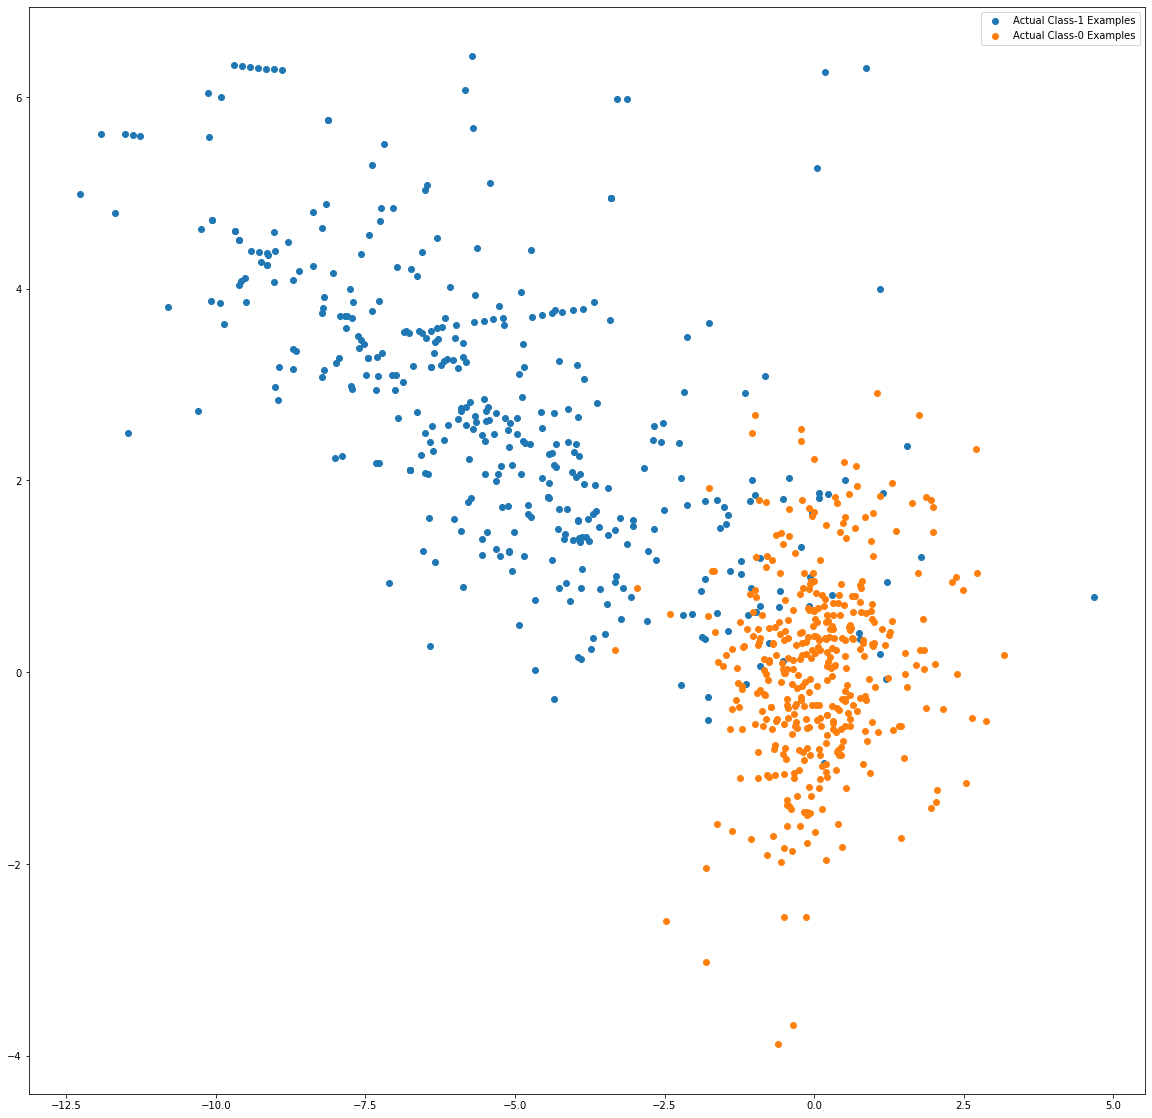

In [119]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# X_train_pt_1 = X_train_pt.to_numpy()[np.where(y_train_pt==1.0)]
# X_train_pt_0 = X_train_pt.to_numpy()[np.where(y_train_pt==0.0)]
X_train_pt_1 = X_train_pt[y_train_pt == 1.0]
X_train_pt_0 = X_train_pt[y_train_pt == 0.0]

np.random.shuffle(X_train_pt_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_pt_1[:, top_var_index], X_train_pt_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], top_var_index], X_train_pt_0[:X_train_pt_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

| Type of OverSampling | Model                | Parameter                        | ROC-AUC Score | F1-Score     | Precision    | Recall       |
|----------------------|----------------------|----------------------------------|---------------|--------------|--------------|--------------|
| None                 | LogisticRegression       | {'C': 0.01, 'penalty': 'l2'}                         | 0.97575543  | 0.65531914 | 0.56204379 | 0.78571428 |
| ROS                  | LogisticRegression | {'C': 4, 'penalty': 'l2'} | 0.97114469 | 0.93335314 | 0.92783039 | 0.93894203 |
| SMOTE                | LogisticRegression | {'C': 4, 'penalty': 'l2'} | 0.97002988 | 0.92396317 | 0.92136187 | 0.92657920 |
| ADASYN               | LogisticRegression | {'C': 4, 'penalty': 'l2'}  |	0.9173743861 | 0.82820647 | 0.83983223 | 0.81689818 |


| Type of OverSampling | Model                  | Parameter                                      | ROC-AUC Score | F1-Score      | Precision     | Recall        |
|----------------------|------------------------|------------------------------------------------|---------------|---------------|---------------|---------------|
| None                 | KNeighborsClassifier | {'metric': 'manhattan', 'n_neighbors': 9}              | 0.93857372  | 0.83146067 | 0.92500000 | 0.75510204 |
| ROS                  | KNeighborsClassifier |	{'n_neighbors': 9} | 0.93984146 | 0.91834175 | 0.99859515 | 0.85002813 |
| SMOTE                | KNeighborsClassifier |	{'n_neighbors': 9} | 0.95408810 | 0.94103795 | 0.99511783 | 0.89253306 |
| ADASYN               | KNeighborsClassifier | {'n_neighbors': 9} | 0.86909228 | 0.82201308 | 0.99482965	| 0.70035167 |


| Type of OverSampling | Model                     | Parameter                                                                                       | ROC-AUC Score | F1-Score     | Precision    | Recall       |
|----------------------|---------------------------|------------------------------------------------------------------------------------------------|---------------|--------------|--------------|--------------|
| None                 | DecisionTreeClassifier   | {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} | 0.93144653  | 0.82000000 | 0.80392156 | 0.83673469 |
| ROS                  | DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} | 0.90116885 | 0.87461071 | 0.96804900 | 0.79762239 |
| SMOTE                | DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} | 0.94522907 | 0.92532892 | 0.96370146 | 0.88989518 |
| ADASYN               | DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} | 0.85263132 | 0.78824911	| 0.88945856	| 0.70771935 |


| Type of OverSampling | Model                   | Parameter                                        | ROC-AUC Score | F1-Score     | Precision   | Recall       |
|----------------------|-------------------------|-------------------------------------------------|---------------|--------------|-------------|--------------|
| None                 | RandomForestClassifier   | {'min_samples_split': 5, 'n_estimators': 500}          | 0.95920637  | 0.81218274 | 0.80808080 | 0.81632653 |
| ROS                  | RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500} | 0.96832102 | 0.84169042 | 0.99978227 | 0.72676913 |
| SMOTE                | RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500} | 0.98094395 | 0.88350591 | 0.99971124 | 0.79150253 |
| ADASYN               | RandomForestClassifier | {'min_samples_split': 7, 'n_estimators': 500} | 0.95459356 | 0.65531180 |0.99953126	| 0.48744505 |


| Type of OverSampling | Model                 | Parameter                                                           | ROC-AUC Score | F1-Score      | Precision     | Recall        |
|----------------------|-----------------------|---------------------------------------------------------------------|---------------|---------------|---------------|---------------|
| None                 | XGBClassifier            | {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} | 0.98109066  | 0.81592039 | 0.79611650 | 0.83673469 |
| ROS                  | XGBClassifier | {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} | 0.96730077 | 0.92470090 | 0.99940760 | 0.86038618 |
| SMOTE                | XGBClassifier | {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} | 0.98848422 | 0.92789072 | 0.99763316 | 0.86726223 |
| ADASYN               | XGBClassifier | {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} | 0.95132842 | 0.77470117	| 0.99651567	| 0.63365570 |


From above best model is XGBClassifier with SMOTE.

In [120]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf_LogisticRegression = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf_LogisticRegression.fit(X_train_pt, y_train_pt)

# predict on test set to give probability
y_pred_proba = clf_LogisticRegression.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_LogisticRegression.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")

# KNeighborsClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  
clf_KNeighborsClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_KNeighborsClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_KNeighborsClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

# DecisionTreeClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_DecisionTreeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4, min_samples_split=2)   
clf_DecisionTreeClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_DecisionTreeClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_DecisionTreeClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

# XGBClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_XGBClassifier = XGBClassifier(learning_rate=0.6, max_depth=5, subsample=0.7, objective='binary:logistic', eval_metric='auc') 
clf_XGBClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_XGBClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_XGBClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("============================================================================================================")

# RandomForestClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_RandomForestClassifier = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf_RandomForestClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_RandomForestClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_RandomForestClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

LogisticRegression ROC-AUC Score on Test Set = 0.9757554365302679
LogisticRegression F1-Score on Test Set = 0.6553191489361702
LogisticRegression Precision on Test Set = 0.5620437956204379
LogisticRegression Recall on Test Set = 0.7857142857142857
Time taken: 3.38 seconds
KNeighbors Classifier ROC-AUC Score on Test Set = 0.9540881017593559
KNeighbors Classifier F1-Score on Test Set = 0.9410379544991008
KNeighbors Classifier Precision on Test Set = 0.9951178385161367
KNeighbors Classifier Recall on Test Set = 0.892533061339336
Time taken: 778.42 seconds
Decision Tree Classifier ROC-AUC Score on Test Set = 0.9481253005955288
Decision Tree Classifier F1-Score on Test Set = 0.9271112138646085
Decision Tree Classifier Precision on Test Set = 0.9376922385106574
Decision Tree Classifier Recall on Test Set = 0.9167663196398425
Time taken: 8.53 seconds
XGBOOST Classifier ROC-AUC Score on Test Set = 0.9899853119446167
XGBOOST Classifier F1-Score on Test Set = 0.9284384694932781
XGBOOST Classifie

### Best Model is XGBOOST CLassifier with SMOTE: `0.9899853119446167` {learning_rate=0.6, max_depth=5, subsample=0.7}

### Confusion matrix

In [163]:
y_train_pred = clf_LogisticRegression.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

,actual_label,predicted_prob
265518,0,0.000141
180305,0,0.000287
42664,0,0.000099
198723,0,0.000241
82325,0,0.000159


In [164]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.0020506216555485845


In [165]:
# Let's create columns with different probability cutoffs 
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,actual_label,predicted_prob,0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8
265518,0,0.000141,0,0,0,0,0,0,0,0,0
180305,0,0.000287,0,0,0,0,0,0,0,0,0
42664,0,0.000099,0,0,0,0,0,0,0,0,0
198723,0,0.000241,0,0,0,0,0,0,0,0,0
82325,0,0.000159,0,0,0,0,0,0,0,0,0


In [166]:
# calculate Precision and Recall  for various probability cutoffs.

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = metrics.confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

      prob  precision   recall
0 0.990000   0.866667 0.296954
1 0.988000   0.874126 0.317259
2 0.987500   0.875000 0.319797
3 0.987000   0.875000 0.319797
4 0.986000   0.875000 0.319797
5 0.980000   0.883117 0.345178
6 0.970000   0.889535 0.388325
7 0.900000   0.887850 0.482234
8 0.800000   0.898305 0.538071


In [170]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.898305*0.538071)/(0.898305+0.538071)
print(f1)

0.6730157976114889


In [171]:
y_test_pred= clf_LogisticRegression.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.8 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
263020,0,0.000156,0
11378,0,0.000175,0
147283,0,0.002026,0
219439,0,0.000143,0
36939,0,0.011400,0


In [172]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 0.5964912280701754
Recall: 0.6938775510204082
F1 Score: 0.6415094339622641


### Confusion matrix

In [152]:
y_train_pred = clf_KNeighborsClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

,actual_label,predicted_prob
265518,0,0.000000
180305,0,0.000000
42664,0,0.000000
198723,0,0.000000
82325,0,0.000000


In [153]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.8888888888888888


In [154]:
# Let's create columns with different probability cutoffs 
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,actual_label,predicted_prob,0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8
265518,0,0.000000,0,0,0,0,0,0,0,0,0
180305,0,0.000000,0,0,0,0,0,0,0,0,0
42664,0,0.000000,0,0,0,0,0,0,0,0,0
198723,0,0.000000,0,0,0,0,0,0,0,0,0
82325,0,0.000000,0,0,0,0,0,0,0,0,0


In [155]:
# calculate Precision and Recall  for various probability cutoffs.

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = metrics.confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

      prob  precision   recall
0 0.990000   1.000000 0.997462
1 0.988000   1.000000 0.997462
2 0.987500   1.000000 0.997462
3 0.987000   1.000000 0.997462
4 0.986000   1.000000 0.997462
5 0.980000   1.000000 0.997462
6 0.970000   1.000000 0.997462
7 0.900000   1.000000 0.997462
8 0.800000   0.789579 1.000000


In [160]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.997462*0.997462)/(0.997462+0.997462)
print(f1)

0.997462


In [161]:
y_test_pred= clf_KNeighborsClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.99 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
263020,0,0.000000,0
11378,0,0.000000,0
147283,0,0.000000,0
219439,0,0.000000,0
36939,0,0.000000,0


In [162]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 0.6136363636363636
Recall: 0.826530612244898
F1 Score: 0.7043478260869565


### Confusion matrix

In [144]:
y_train_pred = clf_DecisionTreeClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

,actual_label,predicted_prob
265518,0,0.016453
180305,0,0.016453
42664,0,0.016453
198723,0,0.016453
82325,0,0.016453


In [145]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.4837956728611186


In [146]:
# Let's create columns with different probability cutoffs 
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,actual_label,predicted_prob,0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8
265518,0,0.016453,0,0,0,0,0,0,0,0,0
180305,0,0.016453,0,0,0,0,0,0,0,0,0
42664,0,0.016453,0,0,0,0,0,0,0,0,0
198723,0,0.016453,0,0,0,0,0,0,0,0,0
82325,0,0.016453,0,0,0,0,0,0,0,0,0


In [147]:
# calculate Precision and Recall  for various probability cutoffs.

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = metrics.confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

      prob  precision   recall
0 0.990000   0.702032 0.789340
1 0.988000   0.702032 0.789340
2 0.987500   0.702032 0.789340
3 0.987000   0.702032 0.789340
4 0.986000   0.702032 0.789340
5 0.980000   0.702032 0.789340
6 0.970000   0.702032 0.789340
7 0.900000   0.319807 0.840102
8 0.800000   0.319807 0.840102


In [151]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.702032*0.789340)/(0.702032+0.789340)
print(f1)

0.7431304045938908


In [149]:
y_test_pred= clf_DecisionTreeClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.99 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
263020,0,0.127113,0
11378,0,0.016453,0
147283,0,0.954386,0
219439,0,0.016453,0
36939,0,0.954386,0


In [150]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 0.5673758865248227
Recall: 0.8163265306122449
F1 Score: 0.6694560669456068


### Confusion matrix

In [128]:
y_train_pred = clf_RandomForestClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

,actual_label,predicted_prob
265518,0,0.000000
180305,0,0.000000
42664,0,0.000667
198723,0,0.000000
82325,0,0.000000


In [129]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.83575


In [130]:
# Let's create columns with different probability cutoffs 
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,actual_label,predicted_prob,0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8
265518,0,0.000000,0,0,0,0,0,0,0,0,0
180305,0,0.000000,0,0,0,0,0,0,0,0,0
42664,0,0.000667,0,0,0,0,0,0,0,0,0
198723,0,0.000000,0,0,0,0,0,0,0,0,0
82325,0,0.000000,0,0,0,0,0,0,0,0,0


In [131]:
# calculate Precision and Recall  for various probability cutoffs.

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = metrics.confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

      prob  precision   recall
0 0.990000   1.000000 0.885787
1 0.988000   1.000000 0.903553
2 0.987500   1.000000 0.903553
3 0.987000   1.000000 0.911168
4 0.986000   1.000000 0.918782
5 0.980000   1.000000 0.931472
6 0.970000   1.000000 0.946701
7 0.900000   1.000000 0.994924
8 0.800000   1.000000 1.000000


In [135]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.994924*0.903553)/(0.994924+0.903553)
print(f1)

0.9470397218106935


In [142]:
y_test_pred= clf_RandomForestClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.99 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
263020,0,0.002000,0
11378,0,0.004000,0
147283,0,0.030500,0
219439,0,0.000000,0
36939,0,0.224863,0


In [143]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 1.0
Recall: 0.11224489795918367
F1 Score: 0.20183486238532108


### Confusion matrix

In [121]:
y_train_pred = clf_XGBClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

,actual_label,predicted_prob
265518,0,0.000000
180305,0,0.000000
42664,0,0.000000
198723,0,0.000000
82325,0,0.000000


In [122]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)
    

0.9720424


In [123]:
# Let's create columns with different probability cutoffs 
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,actual_label,predicted_prob,0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8
265518,0,0.000000,0,0,0,0,0,0,0,0,0
180305,0,0.000000,0,0,0,0,0,0,0,0,0
42664,0,0.000000,0,0,0,0,0,0,0,0,0
198723,0,0.000000,0,0,0,0,0,0,0,0,0
82325,0,0.000000,0,0,0,0,0,0,0,0,0


In [124]:
# calculate Precision and Recall  for various probability cutoffs.

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = metrics.confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

      prob  precision   recall
0 0.990000   1.000000 0.994924
1 0.988000   1.000000 0.994924
2 0.987500   1.000000 0.994924
3 0.987000   1.000000 0.994924
4 0.986000   1.000000 0.994924
5 0.980000   1.000000 0.997462
6 0.970000   1.000000 1.000000
7 0.900000   1.000000 1.000000
8 0.800000   1.000000 1.000000


In [125]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.994924*0.997093)/(0.994924+0.997093)
print(f1)

0.9960073191463726


The Threshold of "0.9880" gives a Precision and recall of 99.49% and F1 Score of 99.56% on Training data. 
Let see these scores on test data

In [126]:
y_test_pred= clf_XGBClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.99 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
263020,0,0.000000,0
11378,0,0.000000,0
147283,0,0.000000,0
219439,0,0.000000,0
36939,0,0.052453,0


In [127]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 0.7476635514018691
Recall: 0.8163265306122449
F1 Score: 0.7804878048780487


## Summary

we would want high precision because we only want to label relevant transactions as fraudulent. 
For every transaction that is flaggedas fraudulent, you can add the human element to verify whether 
the transaction was doneby calling the customer. However, when precision is low, such tasks are a 
burden because the human effort has to be increased.

We will use this threshold as High Precision is good in predicting "Actual possitives as True Possitives". 
This helps the bank in not wasting resources by identifying a fraud in early phases.